## Worker v.s. Joined BB comparison

In [1]:
cd TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
from TileEM_plot_toolbox import *

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd output

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [14]:
def compute_worker_PR_obj(objid,return_worker_id=False,EXCLUDE_BBG=True,PLOT=False):
    # List of PR measures of all workers 
    precision_lst = []
    recall_lst = []
    worker_lst=[]

    objBBs = bb_info[bb_info.object_id==objid]
    if EXCLUDE_BBG: objBBs=  objBBs[objBBs.worker_id!=3]
    ground_truth_match = my_BBG[my_BBG.object_id==objid]
    BBG_x_locs,BBG_y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
    for bb in objBBs.iterrows():
        oid = bb[1]["object_id"]
        bbx_path= bb[1]["x_locs"]
        bby_path= bb[1]["y_locs"]
        worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
        if PLOT: plt.plot(worker_x_locs,worker_y_locs)
        worker_lst.append(bb[1]["worker_id"])
        precision_lst.append(precision([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs]))
        recall_lst.append(recall([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs]))
    if return_worker_id:
        return np.array(worker_lst),np.array(precision_lst),np.array(recall_lst)
    else:
        return np.array(precision_lst),np.array(recall_lst)

Best worker's PR against BBG:  1.0 1.0


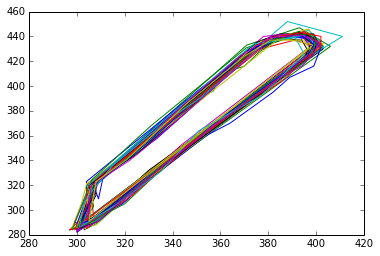

In [15]:
objid = 12
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True,PLOT=True)
# Best recall based workers 
# best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
best_worker =  np.argmax(worker_recall_lst)
print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)

In [ ]:
objid = 12
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
# Best recall based workers 
# best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
best_worker =  np.argmax(worker_recall_lst)
print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
os.chdir("..")
tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
os.chdir(DATA_DIR)

2
Joined PR: 0.994669927408 0.70394067055


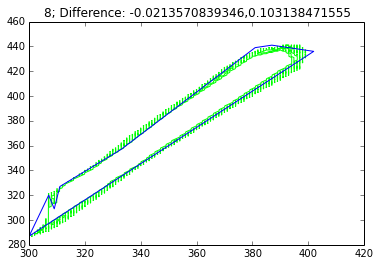

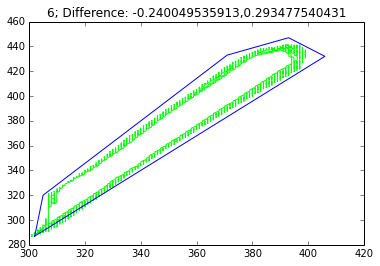

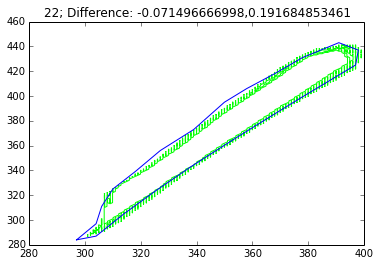

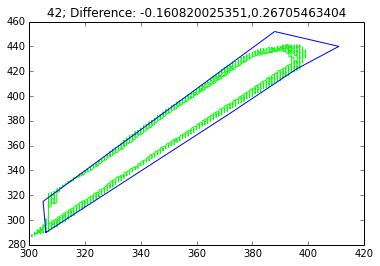

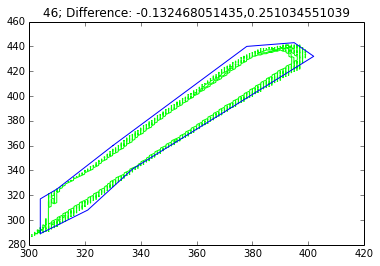

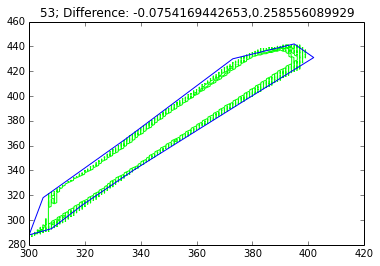

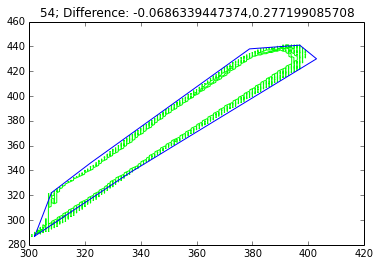

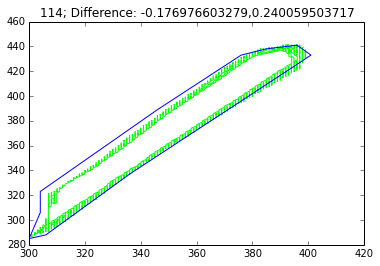

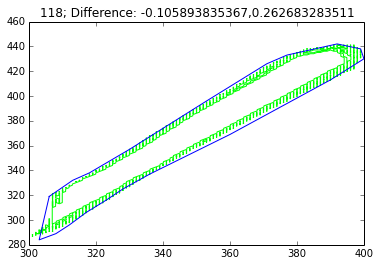

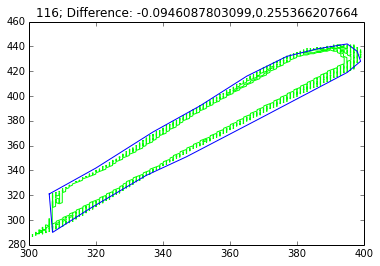

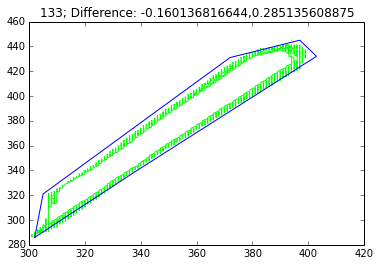

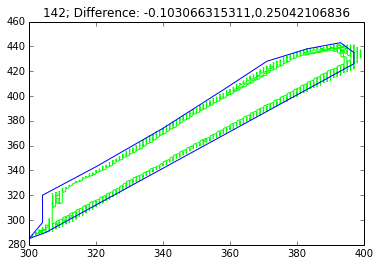

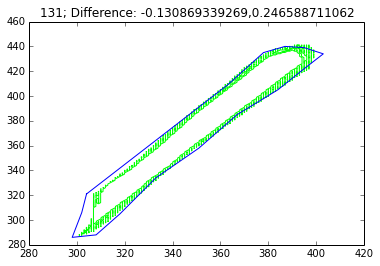

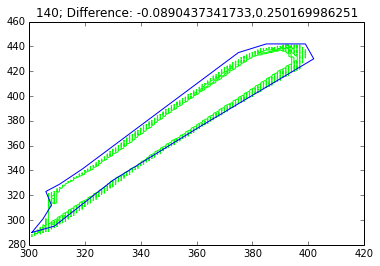

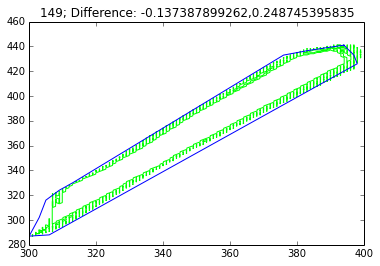

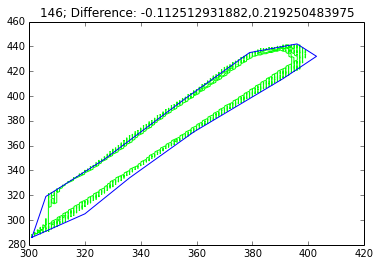

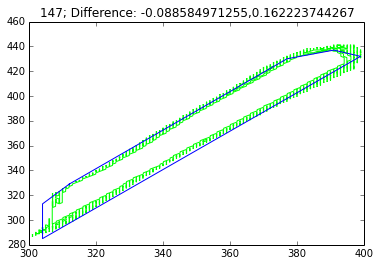

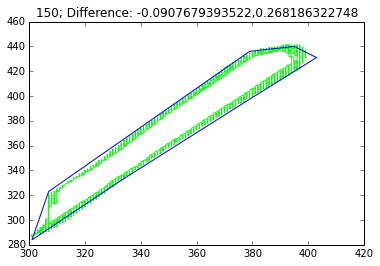

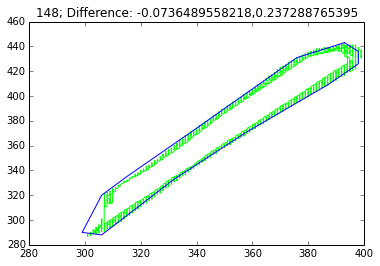

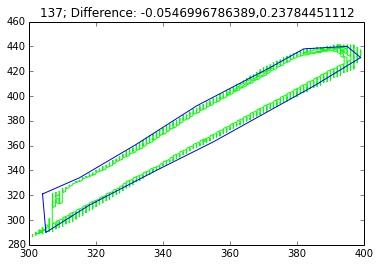

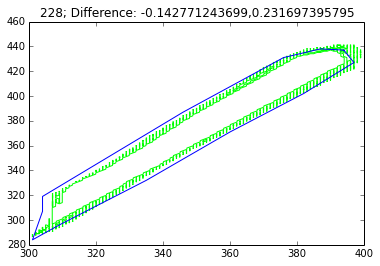

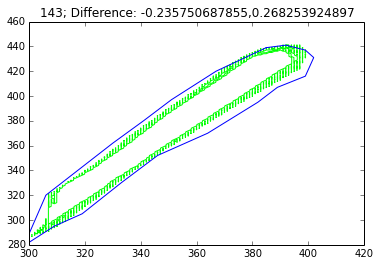

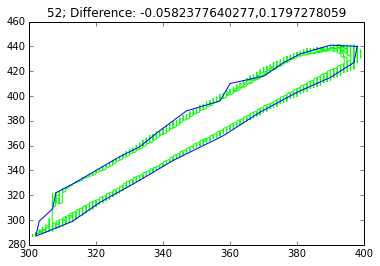

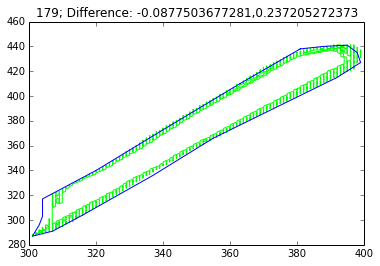

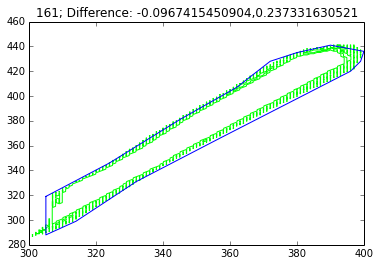

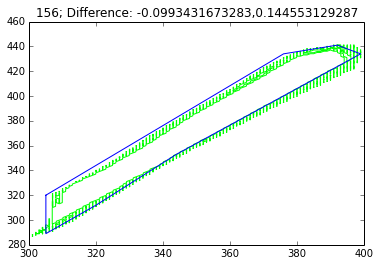

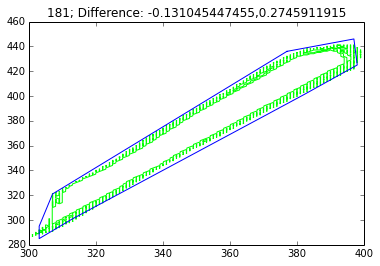

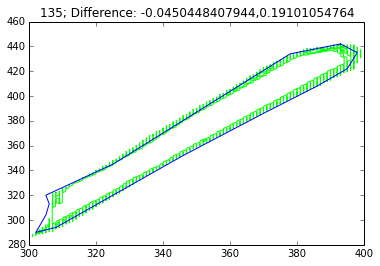

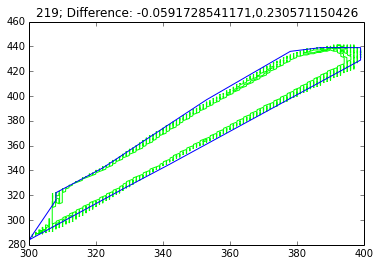

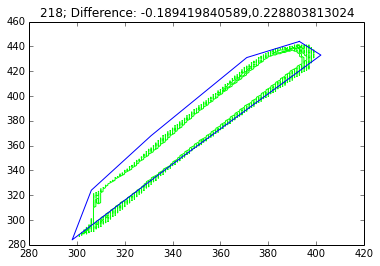

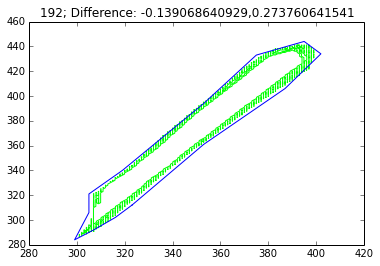

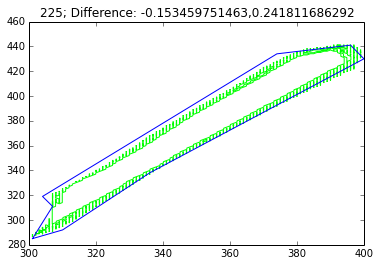

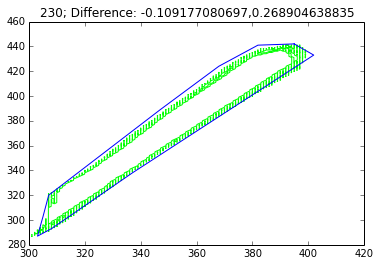

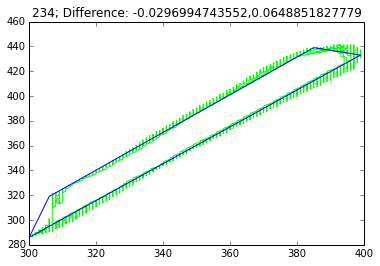

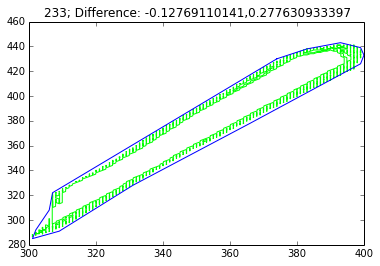

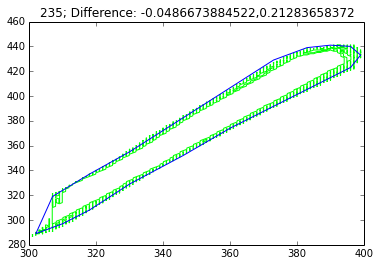

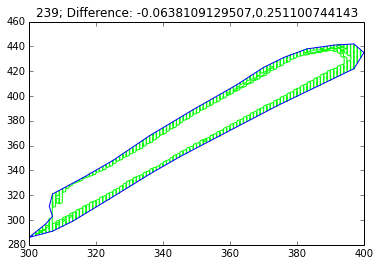

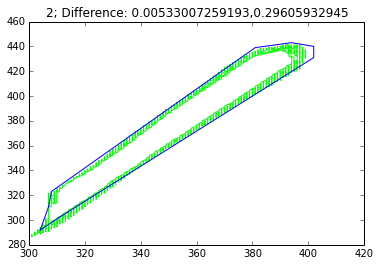

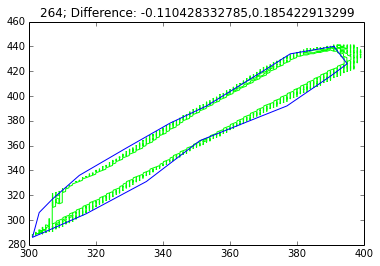

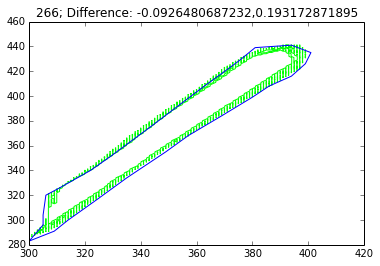

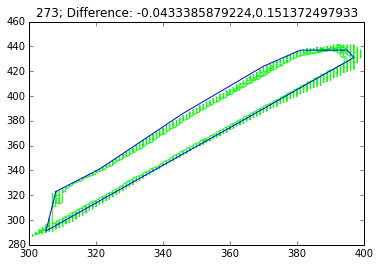

In [59]:
approved_tiles = np.where(indicatorMat[best_worker]==1)[0]

bb_objects = bb_info[bb_info["object_id"]==objid]
best_worker_id = worker_ids[best_worker]
print best_worker_id
#worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]

joined_bb = join_tiles(approved_tiles,tiles)
joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
print "Joined PR:",joined_p, joined_r


ground_truth_match = my_BBG[my_BBG.object_id==objid]
BBG_x_locs,BBG_y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
for bb in bb_objects.iterrows(): 
    bbx_path= bb[1]["x_locs"]
    bby_path= bb[1]["y_locs"]
    worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
    diff_r = recall([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])-joined_r
    diff_p = precision([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])-joined_p
    
    plt.figure()
    plt.title(str(bb[1]["worker_id"])+"; Difference: {0},{1}".format(diff_p,diff_r))
    plt.plot(worker_x_locs,worker_y_locs,color='#0000ff')
    for tidx in approved_tiles:
        plot_coords(Polygon(tiles[tidx]),color="lime")
    
# for worker_bb_info in bb_objects.iterrows():
#     plt.figure()
#     plt.title(worker_bb_info[1]["worker_id"])
#     worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info[1]["x_locs"] ,worker_bb_info[1]["y_locs"]])))#.buffer(0)
#     plot_coords(worker_BB_polygon,color='#0000ff',reverse_xy=True)
#     xlocs,ylocs=process_raw_locs([worker_bb_info[1]["x_locs"] ,worker_bb_info[1]["y_locs"]])
#     for tidx in approved_tiles:
#         plot_coords(Polygon(tiles[tidx]),color="lime")
        
#     diff_r = recall([xlocs],[ylocs])-joined_r
#     diff_p = precision(xlocs,ylocs)-joined_p
#     print "Difference: ", diff_p,diff_r

In [ ]:
print best_worker

In [64]:
def PR_compare(objid):
    worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
    # Best recall based workers 
    # best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
    best_worker =  np.argmax(worker_recall_lst)
    print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
    os.chdir("..")
    tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
    os.chdir(DATA_DIR)
    approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
    for tidx in approved_tiles:
        plot_coords(Polygon(tiles[tidx]),color="lime")
    
    bb_objects = bb_info[bb_info["object_id"]==objid]
    best_worker_id = worker_ids[best_worker]
    print best_worker_id
    worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]
    worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info["x_locs"].values[0],worker_bb_info["y_locs"].values[0]])))#.buffer(0)

    plot_coords(worker_BB_polygon,color='#0000ff',reverse_xy=True)
    
    joined_bb = join_tiles(approved_tiles,tiles)
    joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
    print "Joined PR:",joined_p, joined_r
    diff_r = max(worker_recall_lst)-joined_r
    diff_p = max(worker_precision_lst)-joined_p
    print "Difference: ", diff_p,diff_r
    return diff_p,diff_r

  0%|          | 0/47 [00:00<?, ?it/s]

Best worker's PR against BBG:  0.944169228157 0.992825993557
Number of non-overlapping tile regions (M) :  3765
Number of workers (N) :  33
all unvoted tiles: [  4   5   6   7  15  20  25  26  27  33  34  35  36  38  39  41  44  45
  47  51  54  55  59  60  61  62  63  65  66  67  68  69  70  71  72  73
  76  78  80  84  88  91  92  95  99 100 102 104 105 106 107 108 109 110
 111 112 139 160 161 163 164 166 169 170 171 176 178 195 196 212 246 248
 324 329]
all unvoted workers: []
Object  1
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
114
Joined PR:

  2%|▏         | 1/47 [01:14<57:02,  0.01it/s]

 0.19265022006 0.876846175945
Difference:  0.751519008098 0.115979817613
Best worker's PR against BBG:  0.977930266743 1.0
Number of non-overlapping tile regions (M) :  1377
Number of workers (N) :  36
all unvoted tiles: [  1   6   9  11  12  13  15  16  17  18  19  21  23  24  25  26  27  28
  29  31  34  35  36  39  40  41  43  44  46  48  49  57  62  70  71  73
  85  86  87  92 106 148 153]
all unvoted workers: []
Object  2
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
175
Joined PR:

  4%|▍         | 2/47 [01:37<36:40,  0.02it/s]

 0.905754672904 0.88292734103
Difference:  0.0721755938388 0.11707265897
Best worker's PR against BBG:  0.990248040059 0.94648436312
Number of non-overlapping tile regions (M) :  815
Number of workers (N) :  38
all unvoted tiles: [  1   2   3   5   7   9  10  13  14  18  19  21  22  27  32  33  38  53
  54  56  57  60  63  78 100 101 102 106 107]
all unvoted workers: []
Object  3
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
175
Joined PR:

  6%|▋         | 3/47 [01:51<27:18,  0.03it/s]

 0.989711043852 0.759672133494
Difference:  0.000536996206573 0.186812229626
Best worker's PR against BBG:  0.981390012593 0.983619260089
Number of non-overlapping tile regions (M) :  1127
Number of workers (N) :  39
all unvoted tiles: [  0   4   6   7   9  12  13  14  16  17  18  19  20  22  24  27  28  31
  32  33  34  35  37  38  41  42  43  46  47  48  49  50  52  53  54  55
  57  59  60  65  70  75  83  89  90  96  98 109 164 191]
all unvoted workers: []
Object  4
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
232
Joined PR:

  9%|▊         | 4/47 [02:12<23:39,  0.03it/s]

 0.987877651488 0.757449735695
Difference:  -0.00648763889499 0.226169524393
Best worker's PR against BBG:  0.990837224185 0.950324076004
Number of non-overlapping tile regions (M) :  1382
Number of workers (N) :  38
all unvoted tiles: [ 3  6  8  9 11 13 14 16 21 24 26 27 29 32 33 35 37 38 39 41 42 43 44 55 63
 76 89 91 94]
all unvoted workers: []
Object  5
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
238
Joined PR:

 11%|█         | 5/47 [02:39<22:17,  0.03it/s]

 0.991882444416 0.650338712449
Difference:  -0.00104522023162 0.299985363555
Best worker's PR against BBG:  0.996977818327 1.0
Number of non-overlapping tile regions (M) :  417
Number of workers (N) :  39
all unvoted tiles: [ 5  6  8 11 12 13 14 15 18 33 34]
all unvoted workers: []
Object  6
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
109
Joined PR:

 13%|█▎        | 6/47 [02:46<18:57,  0.04it/s]

 0.991373451936 0.519776174333
Difference:  0.00560436639123 0.480223825667
Best worker's PR against BBG:  0.942381337373 0.974135869084
Number of non-overlapping tile regions (M) :  1286
Number of workers (N) :  39
all unvoted tiles: [ 10  11  16  17  22  27  29  61  67 115]
all unvoted workers: []
Object  7
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 15%|█▍        | 7/47 [03:09<18:00,  0.04it/s]

 0.96696613716 0.4371759623
Difference:  -0.024584799787 0.536959906783
Best worker's PR against BBG:  0.965834097823 0.989920558258
Number of non-overlapping tile regions (M) :  6068
Number of workers (N) :  37
all unvoted tiles: [  2   3   4   5   6   7   8   9  10  12  13  14  16  19  21  22  23  25
  26  28  30  35  40  41  42  44  47  48  49  50  54  56  57  59  63  64
  65  66  68  70  75  76  79  82  84  85  88  89  90  91  93  94  95  97
  98  99 101 105 106 107 109 111 112 113 117 118 119 120 121 122 123 125
 126 143 148 167 195 199 201 202 207 209 237 240 245 287 288 292 293 294
 301 303 304 306 307 311 377 427 429 432 490 509 682 900]
all unvoted workers: []
Object  8
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
247
Joined PR:

 17%|█▋        | 8/47 [05:30<26:52,  0.02it/s]

 0.640837312092 0.807886055717
Difference:  0.324996785731 0.182034502541
Best worker's PR against BBG:  0.999002583262 0.974452641021
Number of non-overlapping tile regions (M) :  1534
Number of workers (N) :  39
all unvoted tiles: [  1   2   3   4   5   6   7   8   9  10  11  15  16  19  20  23  27  29
  30  32  37  42  43  45  47  49  56  65  66  67  68  69  70  71 102 105
 122 128 129 130 146 263]
all unvoted workers: []
Object  9
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
146
Joined PR:

 19%|█▉        | 9/47 [05:58<25:15,  0.03it/s]

 0.997313577435 0.828650698305
Difference:  0.00168900582627 0.145801942716
Best worker's PR against BBG:  1.0 1.0
Number of non-overlapping tile regions (M) :  2411
Number of workers (N) :  41
all unvoted tiles: [ 6  7  8  9 10 15 17 21 22 26 27 28 29 30 33 49 67 69]
all unvoted workers: []
Object  10
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
2
Joined PR:

 21%|██▏       | 10/47 [06:48<25:11,  0.02it/s]

 0.702725381837 0.897197911671
Difference:  0.297274618163 0.102802088329
Best worker's PR against BBG:  0.952480721867 0.974806457062
Number of non-overlapping tile regions (M) :  1327
Number of workers (N) :  40
all unvoted tiles: [  0   1   4   5   7   8  10  11  12  13  14  16  17  24  29  30  35  36
  39  40  41  44  45  47  58  68 124 126 132 135]
all unvoted workers: []
Object  11
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 23%|██▎       | 11/47 [07:12<23:34,  0.03it/s]

 0.971176901243 0.526675462761
Difference:  -0.0186961793758 0.448130994301
Best worker's PR against BBG:  1.0 1.0
Number of non-overlapping tile regions (M) :  1906
Number of workers (N) :  41
all unvoted tiles: [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  20  21  22
  24  25  26  27  28  29  33  34  35  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  54  65  67  68  69  70  71  76  77  78  79  81  83
  84  86  91  92  93 103 104 116 118 128 202 221 230 232 234 315]
all unvoted workers: []
Object  12
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
2
Joined PR:

 26%|██▌       | 12/47 [07:46<22:39,  0.03it/s]

 0.994669927408 0.70394067055
Difference:  0.00533007259193 0.29605932945
Best worker's PR against BBG:  0.990987676546 0.996616520038
Number of non-overlapping tile regions (M) :  2278
Number of workers (N) :  38
all unvoted tiles: [  0   1   2   3   4   6   7   8   9  11  12  13  14  15  18  21  23  24
  25  26  27  29  32  33  35  36  37  38  39  40  41  42  43  44  45  47
  48  49  50  51  52  53  55  56  58  59  60  61  62  63  68  72  76  77
  78  79  81  82  85  86  87  88  90  91  92  94 101 103 112 113 117 119
 128 130 133 146 153 154 159 163 164 165 169 170 174 270 339 340 504]
all unvoted workers: []
Object  13
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
146
Joined PR:

 28%|██▊       | 13/47 [08:26<22:05,  0.03it/s]

 0.993259693264 0.856723099491
Difference:  -0.00227201671822 0.139893420547
Best worker's PR against BBG:  0.978483309871 0.999429953951
Number of non-overlapping tile regions (M) :  4023
Number of workers (N) :  39
all unvoted tiles: [  2   3   6   7   8  15  16  22  35  38  39  40  46  92 118 123]
all unvoted workers: []
Object  14
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
146
Joined PR:

 30%|██▉       | 14/47 [10:08<23:54,  0.02it/s]

 0.971613234041 0.878328024618
Difference:  0.00687007582982 0.121101929334
Best worker's PR against BBG:  0.942954516257 1.0
Number of non-overlapping tile regions (M) :  467
Number of workers (N) :  41
all unvoted tiles: [ 2  9 12 13 17 18 19 20 21 26 28 31 34 40 42 44 49 64]
all unvoted workers: []
Object  15
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
129
Joined PR:

 32%|███▏      | 15/47 [10:16<21:55,  0.02it/s]

 0.962815366126 0.531733341831
Difference:  -0.0198608498684 0.468266658169
Best worker's PR against BBG:  0.996257177416 0.99733704391
Number of non-overlapping tile regions (M) :  999
Number of workers (N) :  36
all unvoted tiles: [  1   2   4   7  11  12  13  17  19  20  23  33  57  59  61  65 108 111
 128]
all unvoted workers: []
Object  16
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
159
Joined PR:

 34%|███▍      | 16/47 [10:34<20:29,  0.03it/s]

 0.972499524129 0.854454941977
Difference:  0.0237576532875 0.142882101933
Best worker's PR against BBG:  0.946851384528 1.0
Number of non-overlapping tile regions (M) :  1218
Number of workers (N) :  43
all unvoted tiles: []
all unvoted workers: []
Object  17
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
174
Joined PR:

 36%|███▌      | 17/47 [11:01<19:28,  0.03it/s]

 0.9794284397 0.719901016341
Difference:  -0.0325770551724 0.280098983659
Best worker's PR against BBG:  1.0 0.994172162696
Number of non-overlapping tile regions (M) :  1386
Number of workers (N) :  38
all unvoted tiles: [  0   3   4   5   6   8   9  11  12  13  17  18  22  24  25  26  27  28
  30  31  32  33  34  35  37  38  39  41  43  44  53  56  72  85 140]
all unvoted workers: []
Object  18
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
201
Joined PR:

 38%|███▊      | 18/47 [11:25<18:24,  0.03it/s]

 0.996521793817 0.871944803386
Difference:  0.00347820618308 0.12222735931
Best worker's PR against BBG:  0.994673490937 1.0
Number of non-overlapping tile regions (M) :  920
Number of workers (N) :  41
all unvoted tiles: [6 7]
all unvoted workers: []
Object  19
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
174
Joined PR:

 40%|████      | 19/47 [11:42<17:14,  0.03it/s]

 0.992541051815 0.732841626159
Difference:  0.00213243912212 0.267158373841
Best worker's PR against BBG:  1.0 0.994044228099
Number of non-overlapping tile regions (M) :  1408
Number of workers (N) :  40
all unvoted tiles: [  2   3   6   8   9  10  13  14  16  18  20  24  29  33  35  37  39  46
  48  52  53  54  63  83 101 111]
all unvoted workers: []
Object  20
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
201
Joined PR:

 43%|████▎     | 20/47 [12:10<16:26,  0.03it/s]

 0.884256402807 0.836478041915
Difference:  0.115743597193 0.157566186184
Best worker's PR against BBG:  1.0 0.99929973859
Number of non-overlapping tile regions (M) :  380
Number of workers (N) :  39
all unvoted tiles: [ 3  5  6  7 10 12 18 20 22 26 27 28]
all unvoted workers: []
Object  21
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
174
Joined PR:

 45%|████▍     | 21/47 [12:17<15:12,  0.03it/s]

 0.989629765008 0.791580669483
Difference:  0.0103702349915 0.207719069108
Best worker's PR against BBG:  1.0 0.999819620027
Number of non-overlapping tile regions (M) :  432
Number of workers (N) :  39
all unvoted tiles: [ 1  3  4  6  8  9 10 11 12 14 15 16 17 23 27 28 29 30 35 36 38 40 42 44 46
 63 74]
all unvoted workers: []
Object  22
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
198
Joined PR:

 47%|████▋     | 22/47 [12:24<14:05,  0.03it/s]

 0.930663085376 0.786285385923
Difference:  0.0693369146245 0.213534234104
Best worker's PR against BBG:  0.988432832752 0.996494793856
Number of non-overlapping tile regions (M) :  2877
Number of workers (N) :  37
all unvoted tiles: [  2   3   5  10  12  15  16  17  19  20  21  23  24  25  26  27  28  29
  31  37  38  42  43  46  47  51  54  57  58  60  62  63  64  66  70  71
  72  73  75  78  80  81  82  84  85  86  88  89  90  91  94  95  96  98
 101 103 104 113 127 146 160 190 192 200 205 211 221 222 223 224 304 323
 334 356]
all unvoted workers: []
Object  23
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
137
Joined PR:

 49%|████▉     | 23/47 [13:14<13:49,  0.03it/s]

 0.991508790513 0.876969541287
Difference:  -0.00307595776093 0.119525252569
Best worker's PR against BBG:  0.997938526121 0.997969244052
Number of non-overlapping tile regions (M) :  1487
Number of workers (N) :  38
all unvoted tiles: [ 1  5  8  9 10 11 12 13 14 15 17 18 20 21 26 27 29 30 44 45 46 47 50]
all unvoted workers: []
Object  24
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
143
Joined PR:

 51%|█████     | 24/47 [13:42<13:08,  0.03it/s]

 0.995983975251 0.846440710056
Difference:  0.00195455086986 0.151528533996
Best worker's PR against BBG:  0.998893855695 0.988457154451
Number of non-overlapping tile regions (M) :  8669
Number of workers (N) :  38
all unvoted tiles: [  2   9  10  13  14  15  16  17  18  19  20  21  24  29  30  31  32  36
  38  39  40  41  42  43  45  46  47  56  57  60  65  68  70  72  74  76
  82  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100 101 102
 105 106 110 111 112 113 121 125 126 127 129 130 131 132 133 135 136 161
 173 175 176 178 179 261 266 268 269 318 322 342 395 400 623 676 699]
all unvoted workers: []
Object  25
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
248
Joined PR:

 53%|█████▎    | 25/47 [16:24<14:26,  0.03it/s]

 0.989678487144 0.813867895825
Difference:  0.00921536855033 0.174589258626
Best worker's PR against BBG:  0.991131807377 0.976675090905
Number of non-overlapping tile regions (M) :  3062
Number of workers (N) :  36
all unvoted tiles: [  3   5   6   7  10  11  12  14  15  16  17  20  23  24  25  26  28  30
  31  36  38  39  41  42  49  50  54  66  67  75  78  80 102 159 176]
all unvoted workers: []
Object  26
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
219
Joined PR:

 55%|█████▌    | 26/47 [17:18<13:59,  0.03it/s]

 0.998359548698 0.84619847505
Difference:  -0.00722774132149 0.130476615855
Best worker's PR against BBG:  0.991800266633 0.999469612716
Number of non-overlapping tile regions (M) :  1137
Number of workers (N) :  39
all unvoted tiles: [ 5  6  7  8  9 14 15 16 17 18 19 20 21 22 23 26 30 32 48 57 60 79]
all unvoted workers: []
Object  27
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
120
Joined PR:

 57%|█████▋    | 27/47 [17:38<13:04,  0.03it/s]

 0.981897370787 0.930309553873
Difference:  0.00990289584639 0.0691600588437
Best worker's PR against BBG:  0.953792059371 0.997547752406
Number of non-overlapping tile regions (M) :  4506
Number of workers (N) :  33
all unvoted tiles: [  2   4   7  13  19  22  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  42  44  45  46  47  48  49  50  51  52  53  54  56  59
  61  62  64  65  66  67  70  71  75  76  83 115 129 161 162 164 167 169
 170 185 187 220]
all unvoted workers: []
Object  28
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
271
Joined PR:

 60%|█████▉    | 28/47 [20:28<13:53,  0.02it/s]

 0.720333273953 0.681026840767
Difference:  0.233458785419 0.316520911639
Best worker's PR against BBG:  0.978628380736 1.0
Number of non-overlapping tile regions (M) :  3409
Number of workers (N) :  35
all unvoted tiles: [  2   3   7   8   9  10  12  14  15  16  18  21  22  24  27  28  30  31
  32  33  36  37  44  46  47  48  49  53  54  58  61  62  65  66  67  68
  80  82 141 234]
all unvoted workers: []
Object  29
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
84
Joined PR:

 62%|██████▏   | 29/47 [21:55<13:36,  0.02it/s]

 0.850063552395 0.770577594644
Difference:  0.128564828341 0.229422405356
Best worker's PR against BBG:  0.852042398034 0.994602705259
Number of non-overlapping tile regions (M) :  2863
Number of workers (N) :  34
all unvoted tiles: [  1   6   7   8   9  13  16  18  20  21  22  24  27  28  34  35  38  39
  40  41  43  44  45  46  47  49  52  55  56  57  58  59  62  63  64  65
  66  67  71  73  75  84  86  87  88  92  93  96  98 100 107 108 111 118
 121 126 156 170 277 287]
all unvoted workers: []
Object  30
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 64%|██████▍   | 30/47 [23:08<13:06,  0.02it/s]

 0.914887032255 0.70460608359
Difference:  -0.0628446342202 0.289996621669
Best worker's PR against BBG:  0.980299993322 0.995706743051
Number of non-overlapping tile regions (M) :  2954
Number of workers (N) :  39
all unvoted tiles: [  0   2  15  21  24  25  27  28  29  30  32  33  34  35  36  37  40  43
  46  47  49  50  51  52  54  55  57  61  63  65  66  67 128 140 168 174
 192 198 305 322 333 368 373 513]
all unvoted workers: []
Object  31
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
245
Joined PR:

 66%|██████▌   | 31/47 [24:08<12:27,  0.02it/s]

 0.990110596321 0.905629955562
Difference:  -0.00981060299855 0.0900767874885
Best worker's PR against BBG:  0.995941869537 0.993495302881
Number of non-overlapping tile regions (M) :  3550
Number of workers (N) :  33
all unvoted tiles: [  3   7  10  15  16  17  18  20  24  25  28  30  31  34  35  36  37  39
  41  43  44  47  48  49  50  52  53  56  57  58  62  63  64  65 100 106
 107 113 115 154 162 177 198 199 212 213 365 366]
all unvoted workers: []
Object  32
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
184
Joined PR:

 68%|██████▊   | 32/47 [25:18<11:51,  0.02it/s]

 0.895422711858 0.920258836173
Difference:  0.100519157679 0.0732364667083
Best worker's PR against BBG:  0.97926068494 0.997923402884
Number of non-overlapping tile regions (M) :  4331
Number of workers (N) :  39
all unvoted tiles: [  1   6   8   9  12  15  17  19  23  24  25  26  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  47  49  52  56  58  62  64
  65  67  77  79  81  83  85  89  93  95  96  97  99 100 103 105 109 110
 111 113 115 116 124 126 127 128 129 130 131 133 136 138 147 162 221 226
 229 241 245 247 271 332 339 344 379 435 482 570 792 793]
all unvoted workers: []
Object  33
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
123
Joined PR:

 70%|███████   | 33/47 [26:54<11:25,  0.02it/s]

 0.956671242561 0.942667645315
Difference:  0.0225894423793 0.0552557575688
Best worker's PR against BBG:  0.993635293917 0.98528563317
Number of non-overlapping tile regions (M) :  6066
Number of workers (N) :  37
all unvoted tiles: [  4   5   8  11  13  14  15  22  24  25  27  31  35  36  37  38  41  42
  45  46  51  53  56  63  64  65  69  70  71  72  75  76  77  80  83  84
  85  86  93  94 103 105 106 107 108 109 111 112 115 118 119 120 121 129
 130 134 138 143 144 146 147 150 154 155 190 198 259 265 275 276 279 345]
all unvoted workers: []
Object  34
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
140
Joined PR:

 72%|███████▏  | 34/47 [29:18<11:12,  0.02it/s]

 0.98028789753 0.852315888654
Difference:  0.0133473963876 0.132969744516
Best worker's PR against BBG:  0.904921900199 1.0
Number of non-overlapping tile regions (M) :  6771
Number of workers (N) :  34
all unvoted tiles: [   1    2    3    6    7    8    9   10   11   12   13   14   15   19   21
   24   26   27   30   32   33   34   35   36   37   39   40   41   43   45
   47   50   51   53   55   56   58   61   62   64   65   66   67   69   71
   72   74   76   77   81   82   85   86   88   92   98   99  103  106  109
  114  115  116  117  120  123  129  130  133  136  137  138  139  140  141
  143  171  172  176  202  204  206  209  224  378  379  380  381  414  524
  694 1016 1311 1591]
all unvoted workers: []
Object  35
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
169
Joined PR:

 74%|███████▍  | 35/47 [32:33<11:09,  0.02it/s]

 0.174886792694 0.95561083761
Difference:  0.730035107505 0.0443891623897
Best worker's PR against BBG:  0.997405428439 0.967924529193
Number of non-overlapping tile regions (M) :  5927
Number of workers (N) :  38
all unvoted tiles: [  0   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  30  38  41  43  44  45  46  47  48  50
  51  52  53  54  55  56  57  58  59  60  61  63  64  65  66  67  69  70
  72  73  74  75  76  77  78  79  81  83  84  86  88  90  91  97  98 101
 102 103 104 107 111 112 114 115 116 117 119 121 122 123 125 126 127 128
 130 133 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 151
 152 153 155 156 157 158 159 160 161 162 164 165 166 167 168 170 171 173
 176 178 180 182 184 186 189 191 192 194 196 198 200 202 204 207 209 211
 215 217 219 222 224 226 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 

 77%|███████▋  | 36/47 [35:04<10:43,  0.02it/s]

 0.99361996016 0.837596010974
Difference:  0.00378546827917 0.130328518219
Best worker's PR against BBG:  0.985924409595 0.99114444876
Number of non-overlapping tile regions (M) :  2503
Number of workers (N) :  36
all unvoted tiles: [  0   1   2   3   4   5   6   7   9  14  15  17  21  22  25  29  30  31
  33  34  36  38  39  41  42  43  45  48  49  50  51  53  54  56  57  58
  59  61  62  66  68  69  70  71  72  74  75  76  78  80  87  98 120 129
 133 134 135 153 155 238 246 324 331]
all unvoted workers: []
Object  37
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 79%|███████▊  | 37/47 [36:08<09:46,  0.02it/s]

 0.984059590766 0.743535313995
Difference:  0.00186481882922 0.247609134765
Best worker's PR against BBG:  0.993023019738 0.991170637715
Number of non-overlapping tile regions (M) :  2197
Number of workers (N) :  37
all unvoted tiles: [  0   2   6   9  11  12  15  16  17  19  22  23  27  29  32  33  36  37
  38  41  45  47  50  51  52  53  54  55  78 107 108 113 115 117 121 128
 130 131 136 137 192 193]
all unvoted workers: []
Object  38
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
219
Joined PR:

 81%|████████  | 38/47 [36:56<08:44,  0.02it/s]

 0.995475255995 0.913290436965
Difference:  -0.00245223625665 0.0778802007505
Best worker's PR against BBG:  0.992787061632 0.995329003269
Number of non-overlapping tile regions (M) :  2968
Number of workers (N) :  39
all unvoted tiles: [  3   6   8   9  10  12  22  25  27  29  31  32  33  35  39  41  43  46
  47  49  50  52  56  57  58  59  64  95  98  99 121 122 123 132 200]
all unvoted workers: []
Object  39
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
201
Joined PR:

 83%|████████▎ | 39/47 [38:13<07:50,  0.02it/s]

 0.99693493039 0.946249999447
Difference:  -0.00414786875869 0.0490790038221
Best worker's PR against BBG:  0.969951783684 1.0
Number of non-overlapping tile regions (M) :  1256
Number of workers (N) :  39
all unvoted tiles: [ 4  7 11 12 16 17 18 20 21 22 23 24 29 35 36 46 48 49 57 58 61 63 64]
all unvoted workers: []
Object  40
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
68
Joined PR:

 85%|████████▌ | 40/47 [38:38<06:45,  0.02it/s]

 0.0206312682086 1.0
Difference:  0.949320515476 0.0
Best worker's PR against BBG:  0.938146640755 1.0
Number of non-overlapping tile regions (M) :  1757
Number of workers (N) :  37
all unvoted tiles: [  1   3   4   5   7   8  11  12  13  15  16  17  21  22  24  25  28  32
  34  37  42  47  48  51  53  54  55  56  57  59  60  61  62  66  67  68
  69  70  75  76  77  79  80  81  82  85  89  96  99 100 101 102 105 107
 108 110 111 114 115 118 121 122 123 126 129 130 132 139 141 143 173 184
 193 218 222 223 224 240 280 282 380 429 515 596]
all unvoted workers: []
Object  41
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
118
Joined PR:

 87%|████████▋ | 41/47 [39:16<05:44,  0.02it/s]

 0.863864373054 0.570871040373
Difference:  0.0742822677006 0.429128959627
Best worker's PR against BBG:  1.0 0.928517279158
Number of non-overlapping tile regions (M) :  1615
Number of workers (N) :  39
all unvoted tiles: [  1   5   6   8  11  12  16  17  24  27  28  29  37  38  40  41  42  43
  44  45  46  80  81  97  99 109 113 198]
all unvoted workers: []
Object  42
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
114
Joined PR:

 89%|████████▉ | 42/47 [39:47<04:44,  0.02it/s]

 1.0 0.0489979550102
Difference:  0.0 0.879519324148
Best worker's PR against BBG:  0.990731860966 0.955524897277
Number of non-overlapping tile regions (M) :  2725
Number of workers (N) :  40
all unvoted tiles: [  2   9  16  18  19  23  24  25  27  32  33  34  36  37  38  39  40  43
  44  47  49  51  53 101 103 107 109 110 111 112 113 123 129 133 135 136
 137 176 188 216]
all unvoted workers: []
Object  43
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
199
Joined PR:

 91%|█████████▏| 43/47 [40:54<03:48,  0.02it/s]

 0.994585251151 0.831698951496
Difference:  -0.00385339018498 0.12382594578
Best worker's PR against BBG:  0.967303420486 0.979651135897
Number of non-overlapping tile regions (M) :  2741
Number of workers (N) :  39
all unvoted tiles: [  2   4   6   7   9  10  11  13  14  15  17  19  20  25  27  28  29  30
  31  36  38  39  40  41  42  43  44  47  48  49  50  51  53  55  58  60
  63  66  68  69  71  88  96 105 124 125 126 135 137 144 148 167 171 187
 193 212 215 377]
all unvoted workers: []
Object  44
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 94%|█████████▎| 44/47 [41:56<02:51,  0.02it/s]

 0.985227019688 0.815564251176
Difference:  -0.0179235992023 0.164086884721
Best worker's PR against BBG:  0.999828254118 0.974801026442
Number of non-overlapping tile regions (M) :  768
Number of workers (N) :  38
all unvoted tiles: [  1   3   5   6   7   8   9  10  15  16  19  20  21  22  29  31  45  52
  82  91 105]
all unvoted workers: []
Object  45
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 96%|█████████▌| 45/47 [42:09<01:52,  0.02it/s]

 0.984208129189 0.695351555002
Difference:  0.015620124929 0.27944947144
Best worker's PR against BBG:  0.973335085088 0.993678445979
Number of non-overlapping tile regions (M) :  2085
Number of workers (N) :  38
all unvoted tiles: [  1   3   4   5   6   7   9  10  12  13  21  23  24  26  28  32  35  38
  41  52  56  61  80  84  97 100 125 173 210]
all unvoted workers: []
Object  46
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
169
Joined PR:

 98%|█████████▊| 46/47 [42:50<00:55,  0.02it/s]

 0.992664939236 0.778670502583
Difference:  -0.0193298541482 0.215007943396
Best worker's PR against BBG:  0.992956869208 0.99524974385
Number of non-overlapping tile regions (M) :  652
Number of workers (N) :  39
all unvoted tiles:

 [ 1  4  5 12 13 74]
all unvoted workers: []
Object  47
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR: 0.0 0.0
Difference:  0.992956869208 0.99524974385


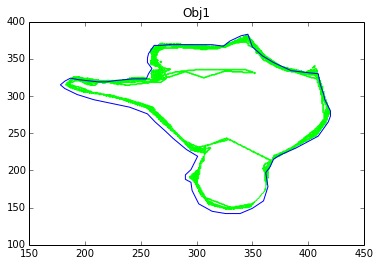

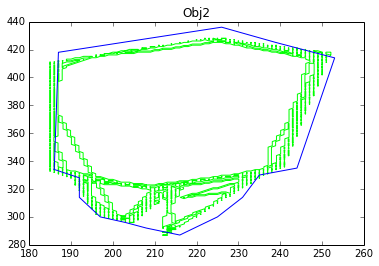

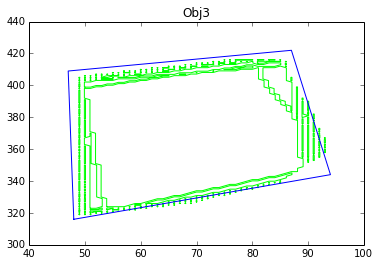

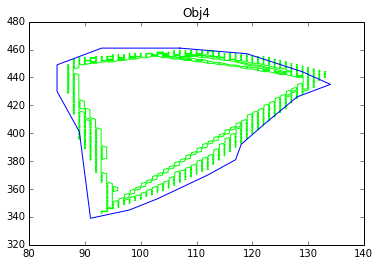

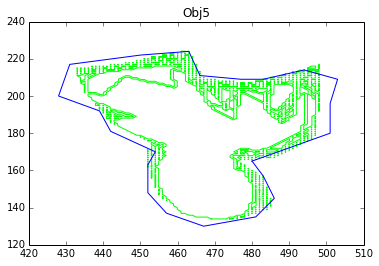

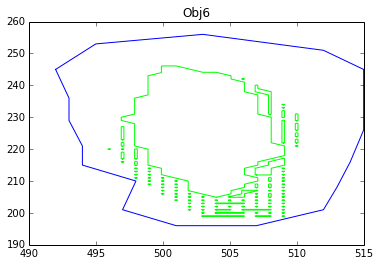

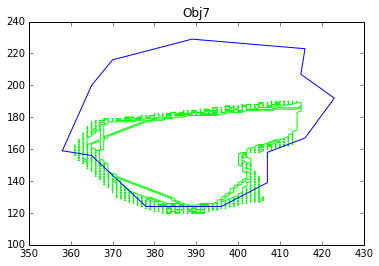

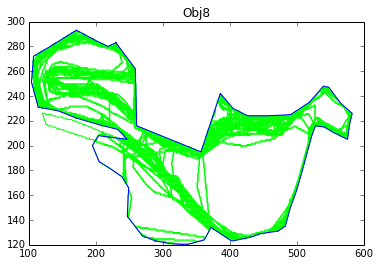

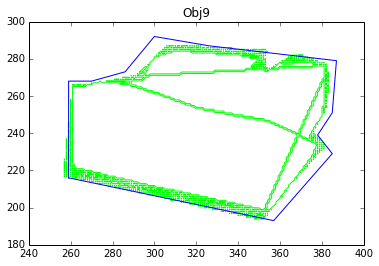

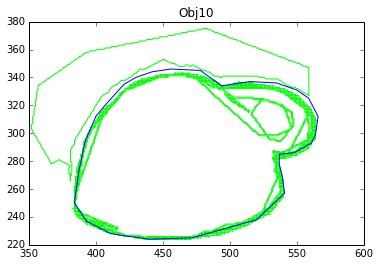

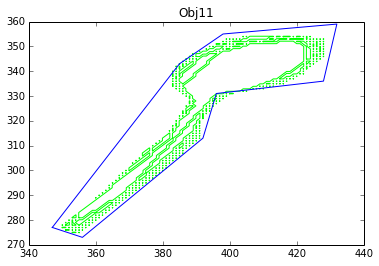

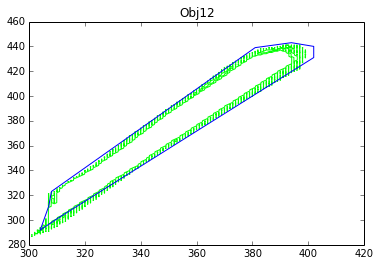

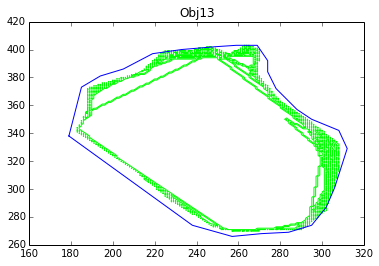

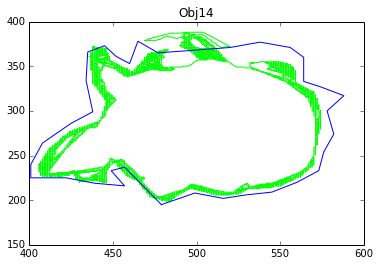

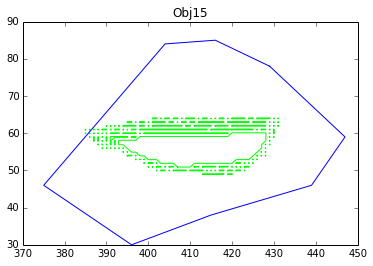

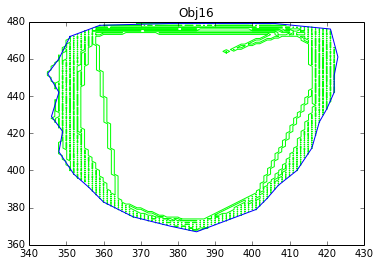

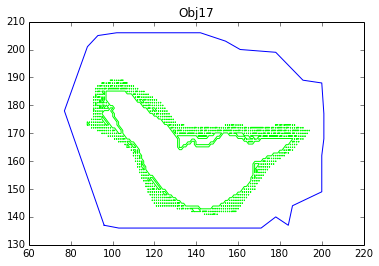

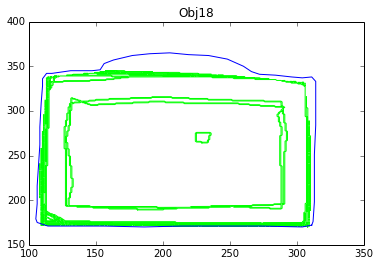

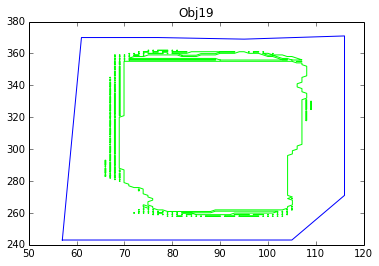

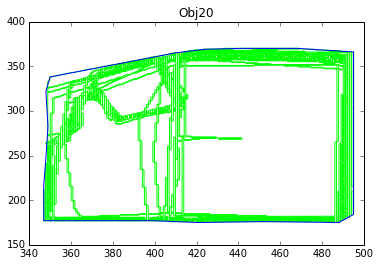

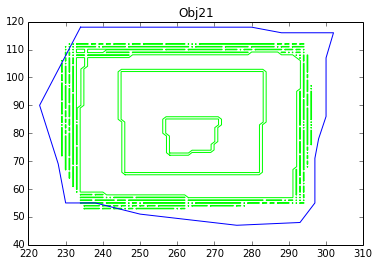

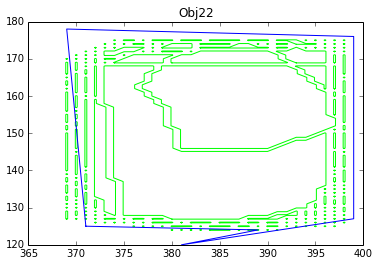

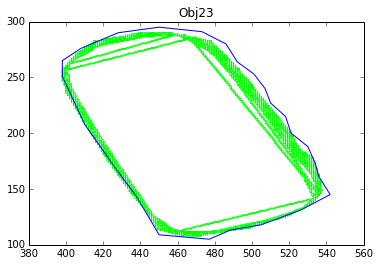

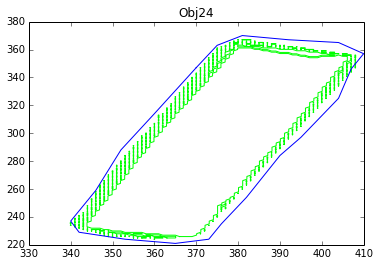

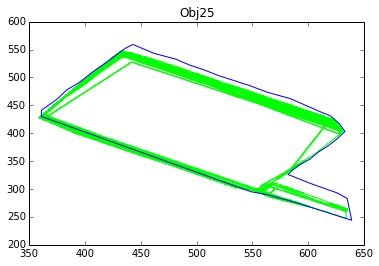

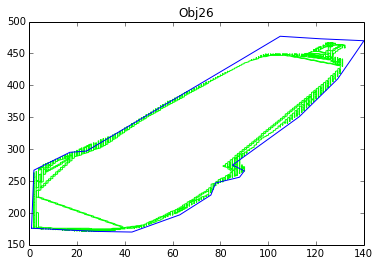

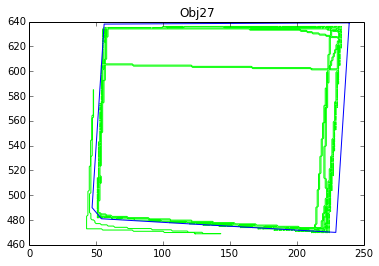

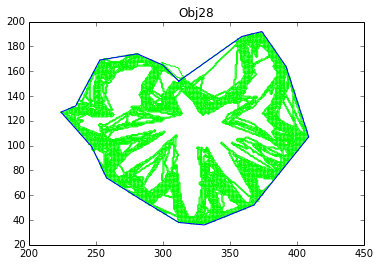

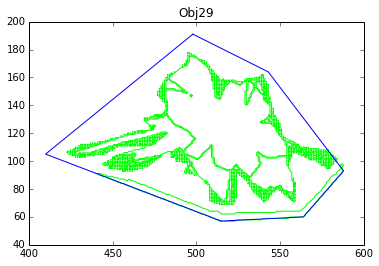

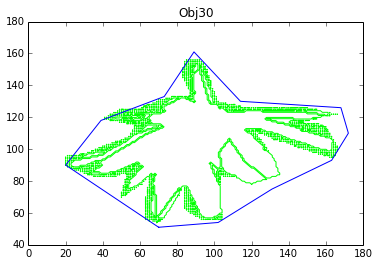

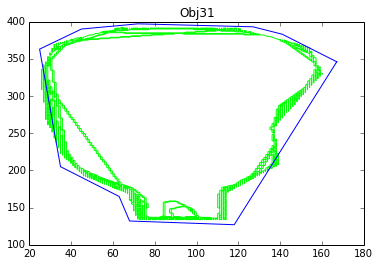

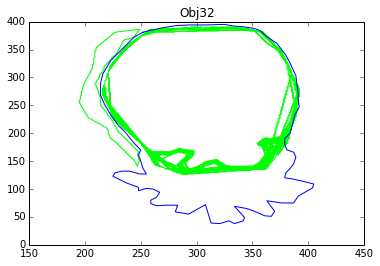

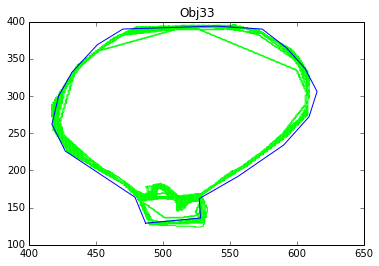

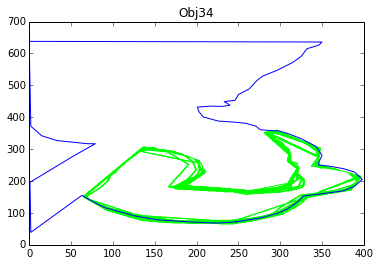

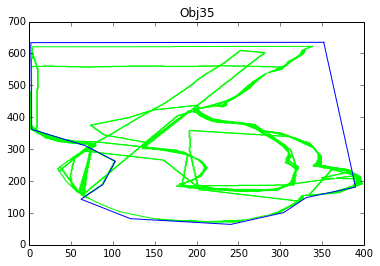

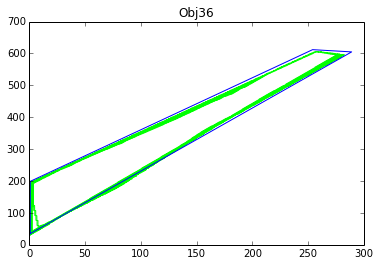

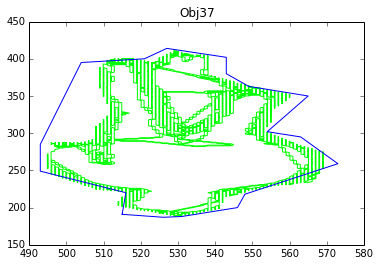

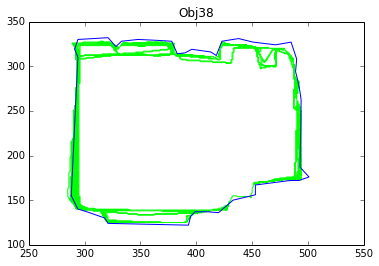

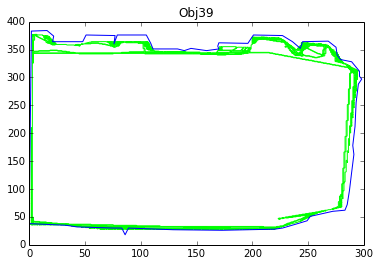

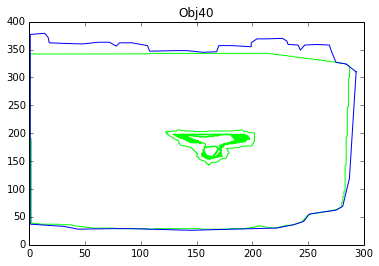

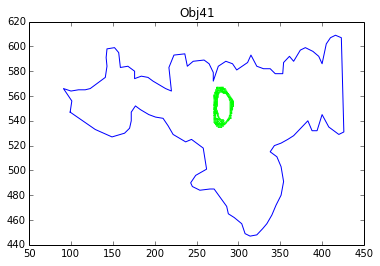

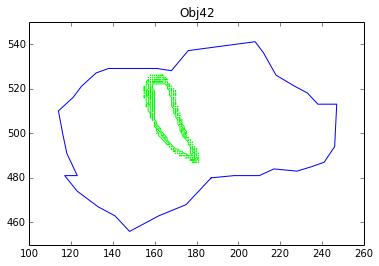

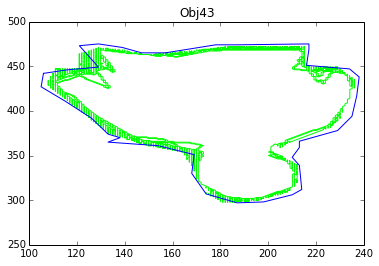

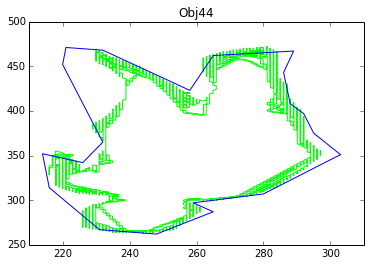

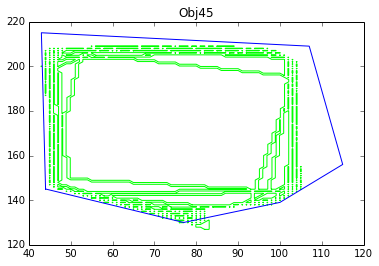

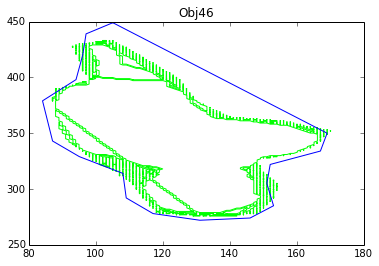

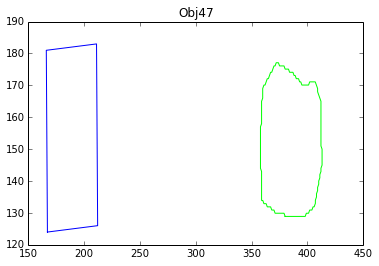

In [65]:
diff_p_lst = []
diff_r_lst = []
for objid in tqdm(object_lst):
    plt.figure()
    plt.title("Obj{}".format(objid))
    diff_p,diff_r=PR_compare(objid)
    diff_p_lst.append(diff_p)
    diff_r_lst.append(diff_r)

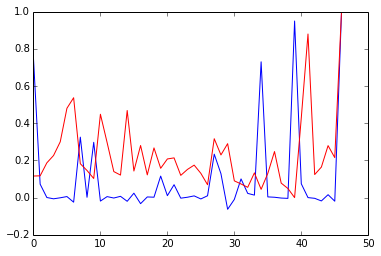

In [67]:
plt.plot(diff_p_lst)
plt.plot(diff_r_lst,color='red')

In [68]:
print "Average precision loss" , mean(diff_p_lst)
print "Average recall loss" , mean(diff_r_lst)

Average precision loss 0.100894542991
Average recall loss 0.228229642721


Best worker's PR against BBG:  0.992956869208 0.99524974385
Number of non-overlapping tile regions (M) :  652
Number of workers (N) :  39
all unvoted tiles: [ 1  4  5 12 13 74]
all unvoted workers: []
Object  47
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR: 0.0 0.0


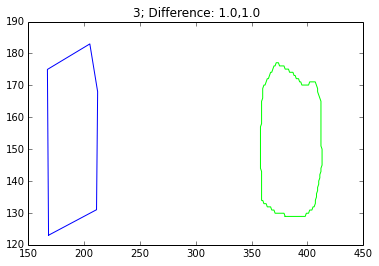

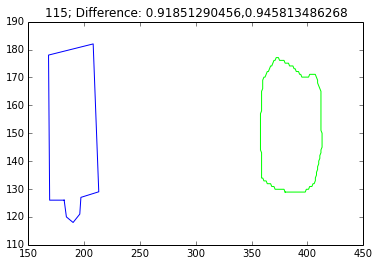

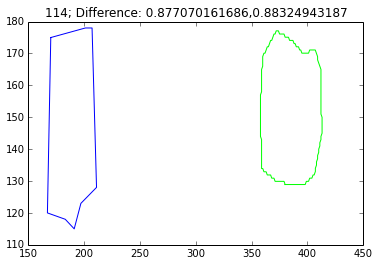

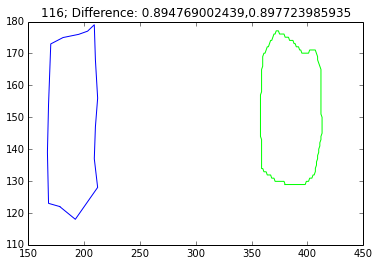

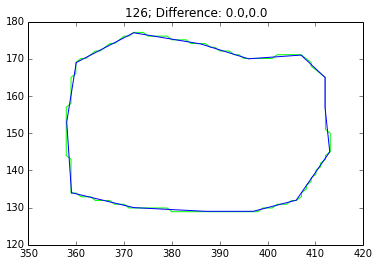

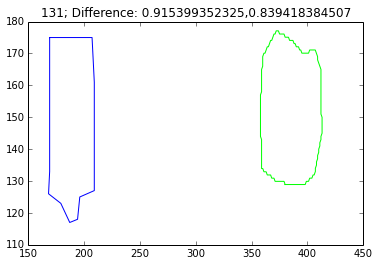

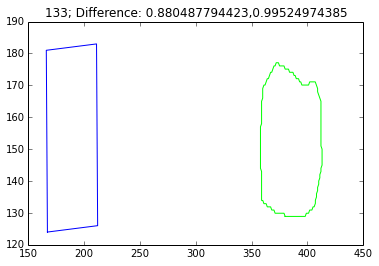

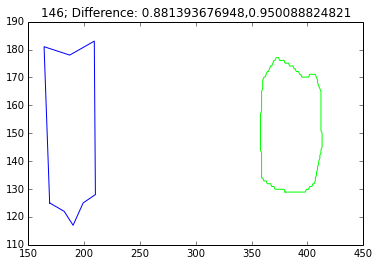

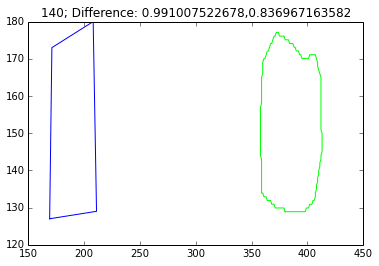

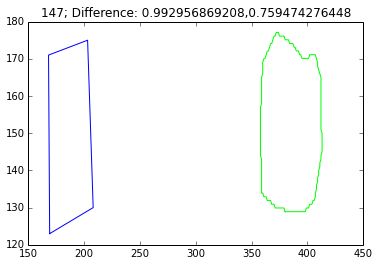

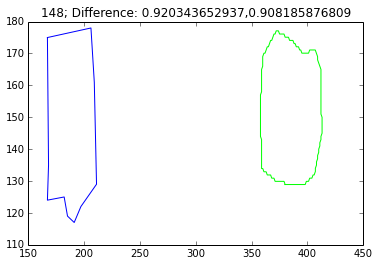

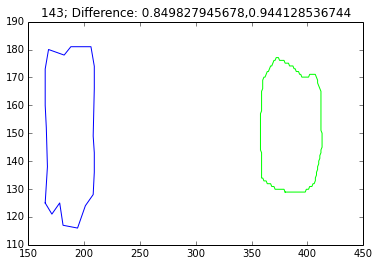

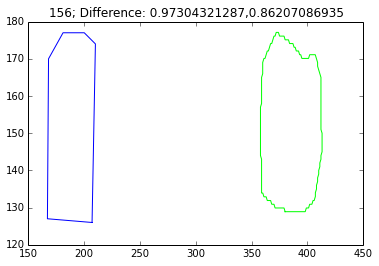

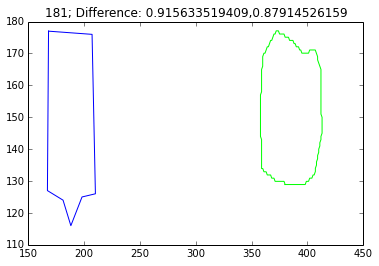

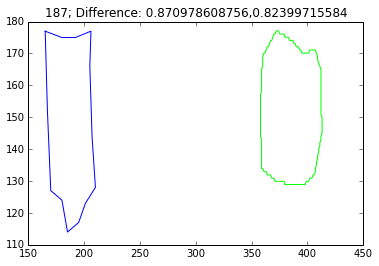

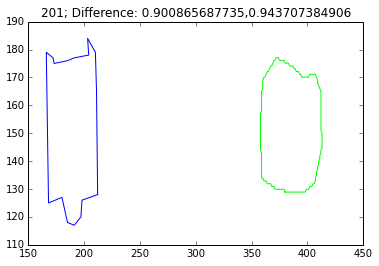

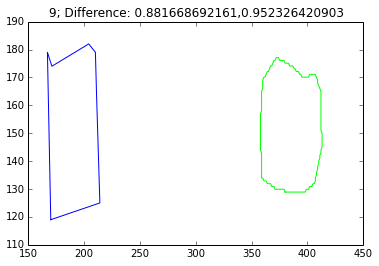

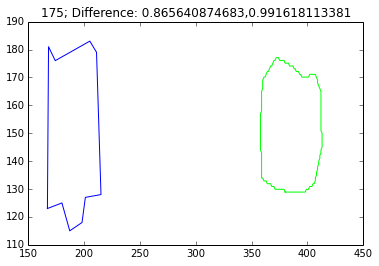

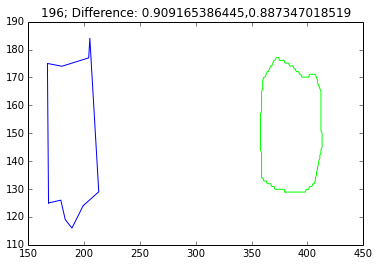

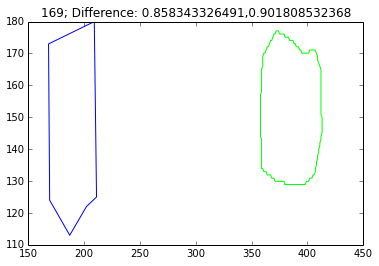

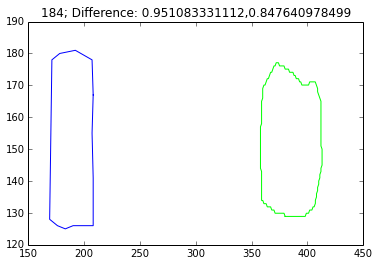

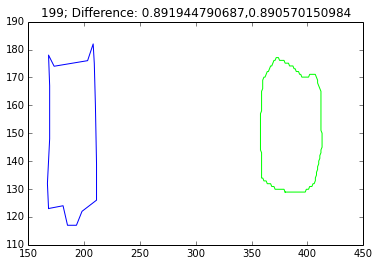

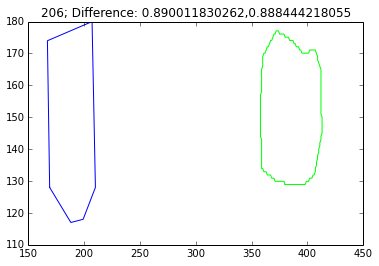

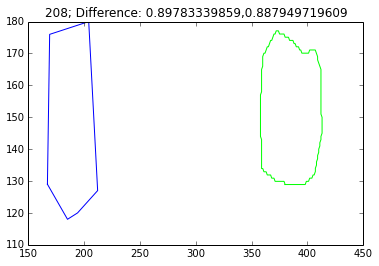

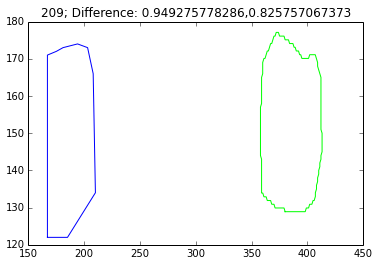

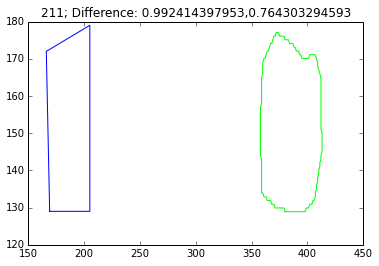

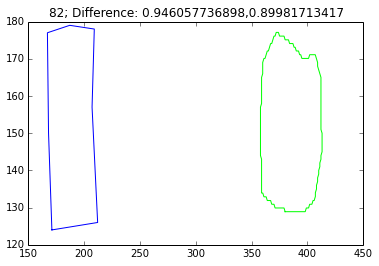

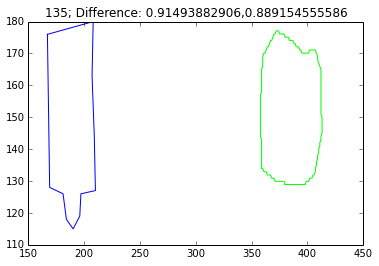

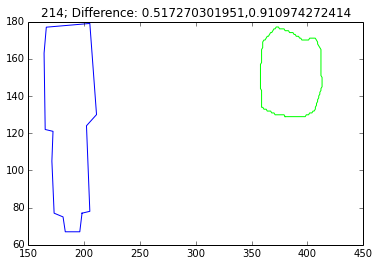

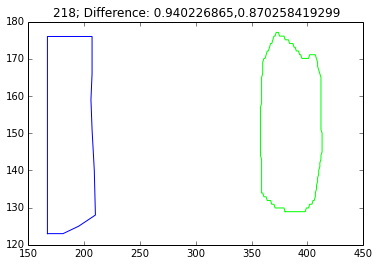

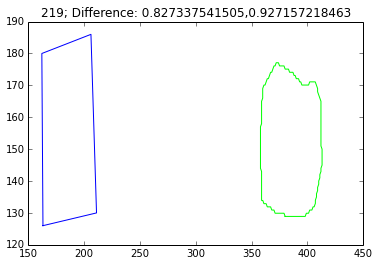

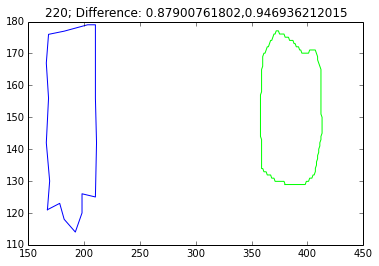

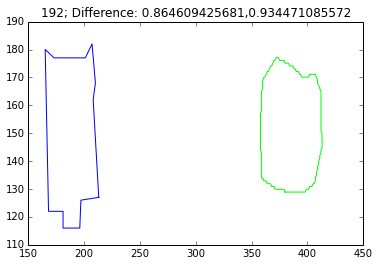

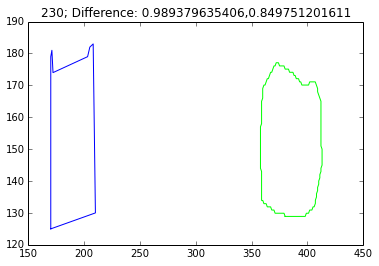

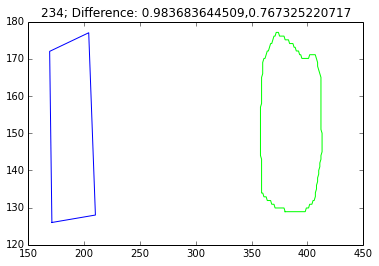

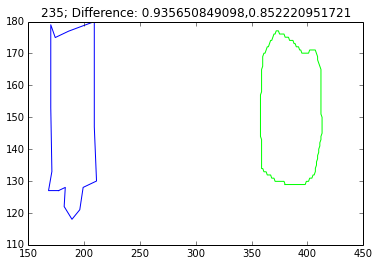

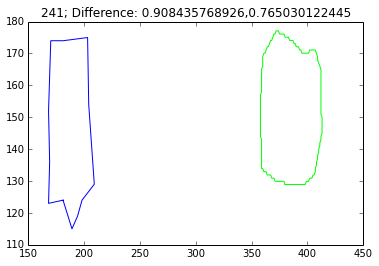

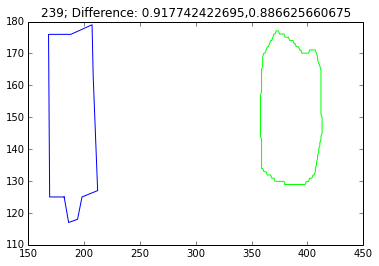

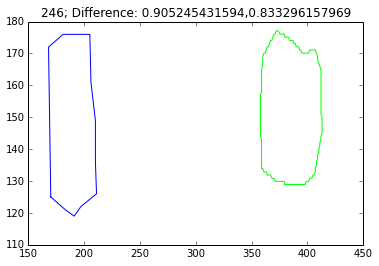

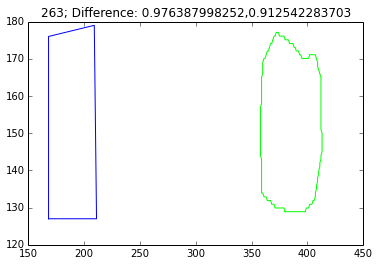

In [69]:
objid = 47
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
# Best recall based workers 
# best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
best_worker =  np.argmax(worker_recall_lst)
print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
os.chdir("..")


tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
os.chdir(DATA_DIR)
approved_tiles = np.where(indicatorMat[best_worker]==1)[0]

bb_objects = bb_info[bb_info["object_id"]==objid]
best_worker_id = worker_ids[best_worker]
print best_worker_id
#worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]

joined_bb = join_tiles(approved_tiles,tiles)
joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
print "Joined PR:",joined_p, joined_r


ground_truth_match = my_BBG[my_BBG.object_id==objid]
BBG_x_locs,BBG_y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
for bb in bb_objects.iterrows(): 
    bbx_path= bb[1]["x_locs"]
    bby_path= bb[1]["y_locs"]
    worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
    diff_r = recall([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])-joined_r
    diff_p = precision([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])-joined_p
    
    plt.figure()
    plt.title(str(bb[1]["worker_id"])+"; Difference: {0},{1}".format(diff_p,diff_r))
    plt.plot(worker_x_locs,worker_y_locs,color='#0000ff')
    for tidx in approved_tiles:
        plot_coords(Polygon(tiles[tidx]),color="lime")
    

In [72]:
best_worker_id

133

In [74]:
worker_ids

array([115, 114, 116, 126, 131, 133, 146, 140, 147, 148, 143, 156, 181,
       187, 201,   9, 175, 196, 169, 184, 199, 206, 208, 209, 211,  82,
       135, 214, 218, 219, 220, 192, 230, 234, 235, 241, 239, 246, 263])

In [73]:
worker_ids[best_worker]

133

In [70]:
best_worker

5

Best worker's PR against BBG:  0.973335085088 0.993678445979
Number of non-overlapping tile regions (M) :  2085
Number of workers (N) :  38
all unvoted tiles: [  1   3   4   5   6   7   9  10  12  13  21  23  24  26  28  32  35  38
  41  52  56  61  80  84  97 100 125 173 210]
all unvoted workers: []
Object  46
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
169
Joined PR: 0.992664939236 0.778670502583


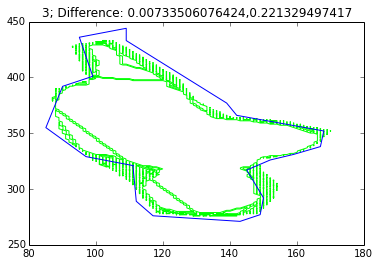

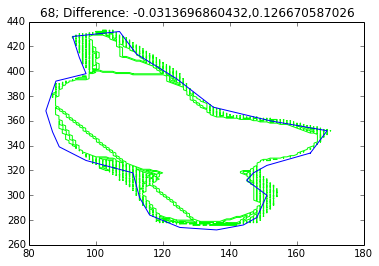

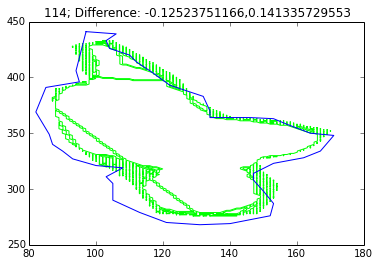

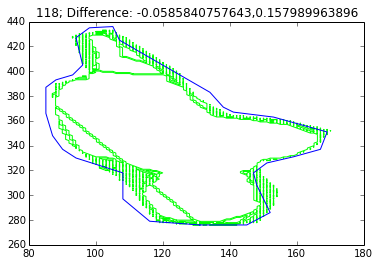

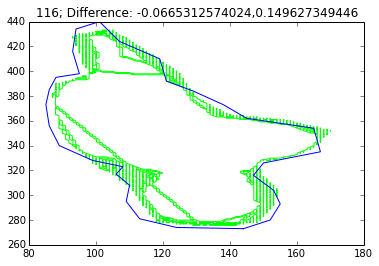

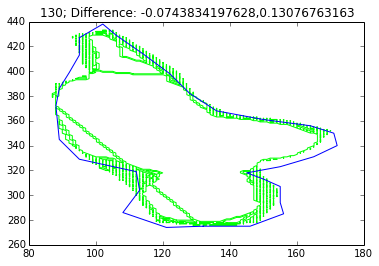

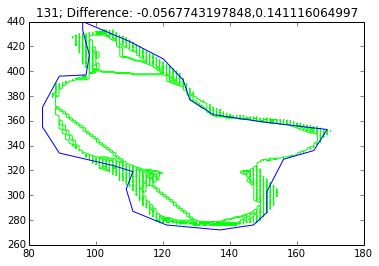

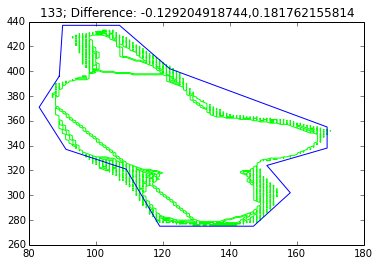

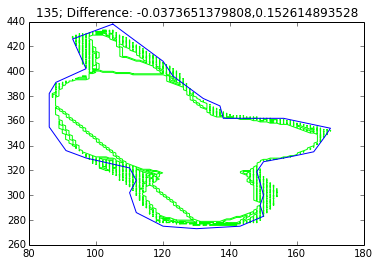

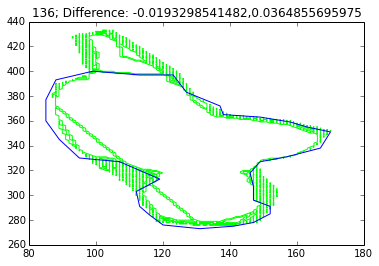

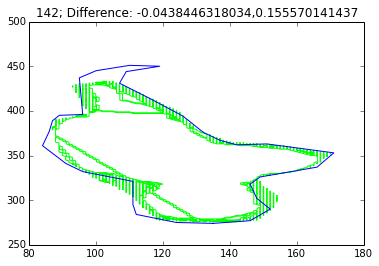

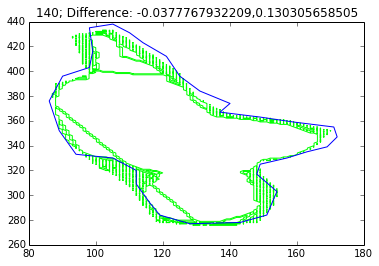

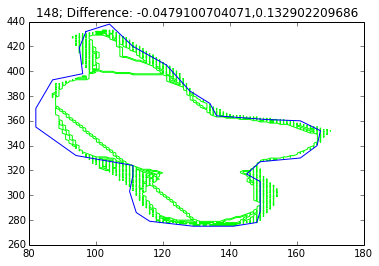

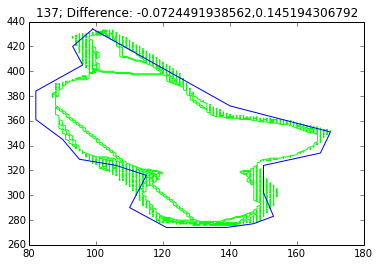

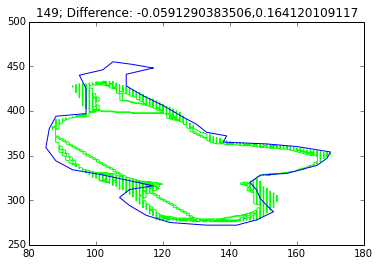

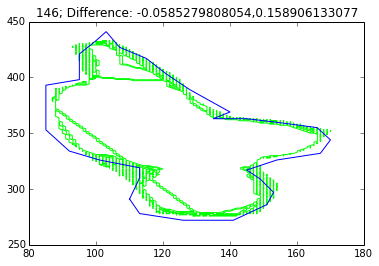

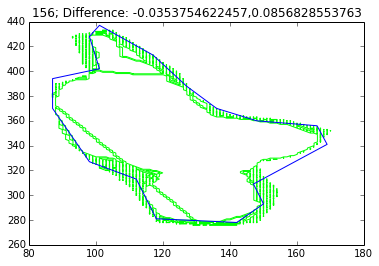

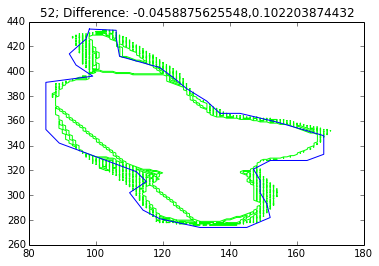

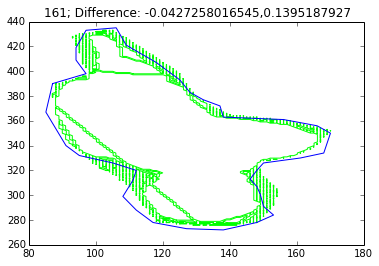

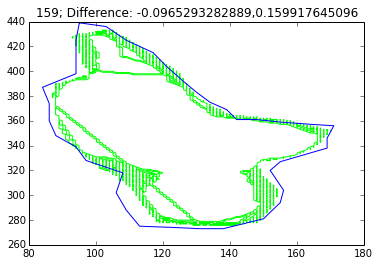

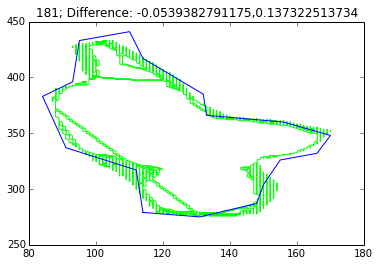

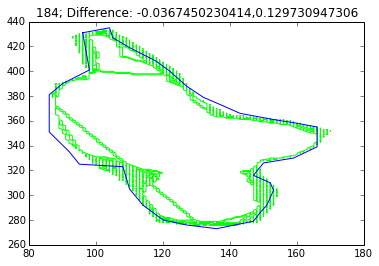

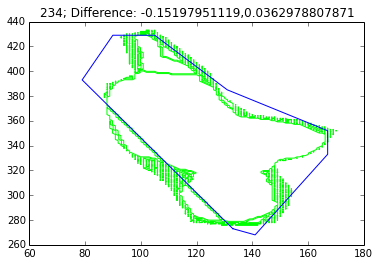

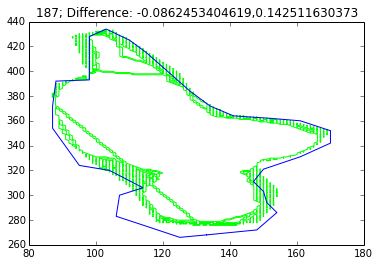

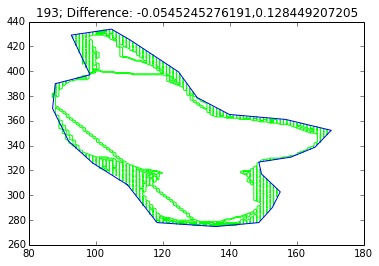

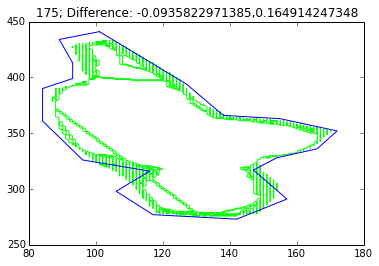

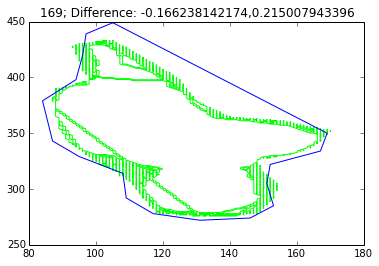

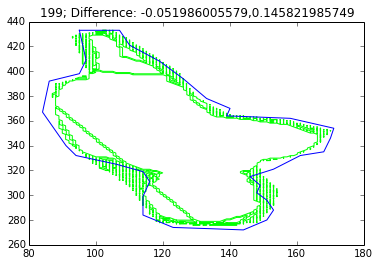

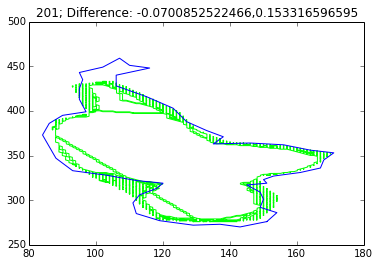

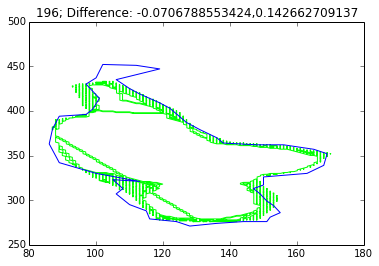

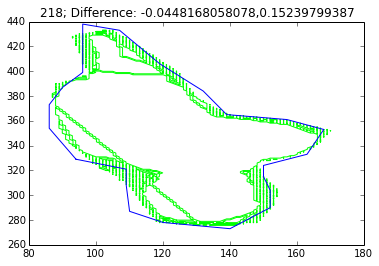

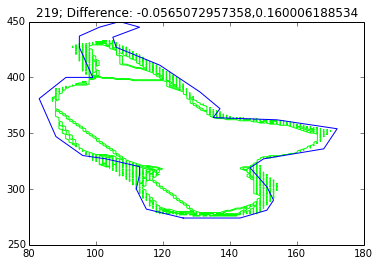

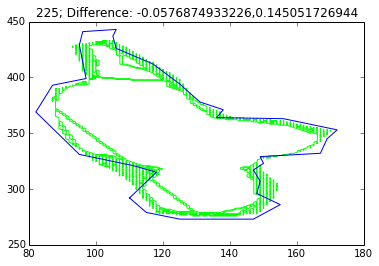

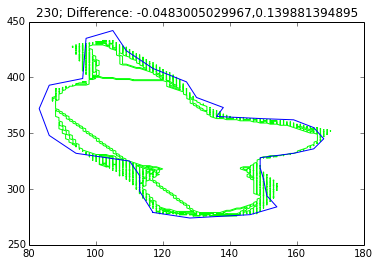

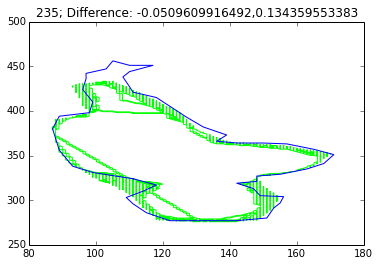

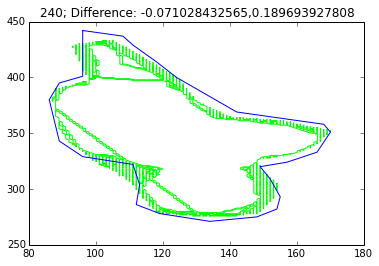

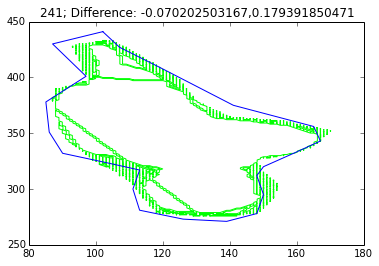

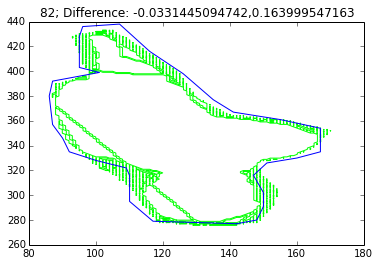

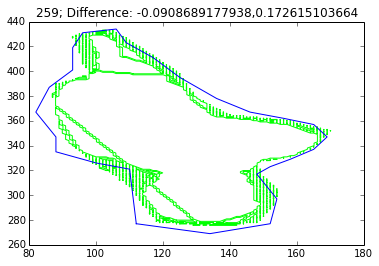

In [75]:
objid = 46
worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
# Best recall based workers 
# best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
best_worker =  np.argmax(worker_recall_lst)
print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
os.chdir("..")


tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
os.chdir(DATA_DIR)
approved_tiles = np.where(indicatorMat[best_worker]==1)[0]

bb_objects = bb_info[bb_info["object_id"]==objid]
best_worker_id = worker_ids[best_worker]
print best_worker_id
#worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]

joined_bb = join_tiles(approved_tiles,tiles)
joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
print "Joined PR:",joined_p, joined_r


ground_truth_match = my_BBG[my_BBG.object_id==objid]
BBG_x_locs,BBG_y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
for bb in bb_objects.iterrows(): 
    bbx_path= bb[1]["x_locs"]
    bby_path= bb[1]["y_locs"]
    worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
    diff_r = recall([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])-joined_r
    diff_p = precision([worker_x_locs,BBG_x_locs],[worker_y_locs,BBG_y_locs])-joined_p
    
    plt.figure()
    plt.title(str(bb[1]["worker_id"])+"; Difference: {0},{1}".format(diff_p,diff_r))
    plt.plot(worker_x_locs,worker_y_locs,color='#0000ff')
    for tidx in approved_tiles:
        plot_coords(Polygon(tiles[tidx]),color="lime")
    

In [ ]:
193

In [76]:
worker_ids

array([ 68, 114, 118, 116, 130, 131, 133, 135, 136, 142, 140, 148, 137,
       149, 146, 156,  52, 161, 159, 181, 184, 234, 187, 193, 175, 169,
       199, 201, 196, 218, 219, 225, 230, 235, 240, 241,  82, 259])

In [77]:
best_worker

25

In [78]:
best_worker_id

169

In [81]:
worker_ids[best_worker-2]

193

In [22]:
def PR_compare(objid):
    worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
    # Best recall based workers 
    # best_worker = list(set((np.argmax(worker_recall_lst),np.argmax(worker_precision_lst))))[0]
    best_worker =  np.argmax(worker_recall_lst)
    print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
    os.chdir("..")
    tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
    os.chdir(DATA_DIR)
    approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
    for tidx in approved_tiles:
        plot_coords(Polygon(tiles[tidx]),color="lime")
    
    bb_objects = bb_info[bb_info["object_id"]==objid]
    best_worker_id = worker_ids[best_worker+2]
    print best_worker_id
    worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]
    worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info["x_locs"].values[0],worker_bb_info["y_locs"].values[0]])))#.buffer(0)

    plot_coords(worker_BB_polygon,linestyle='--',color='#0000ff',reverse_xy=True)
    
    joined_bb = join_tiles(approved_tiles,tiles)
    # Plot Contours but this just overlaps with the tiles itself, rather than joining as a large polygon area
#     if type(joined_bb)==shapely.geometry.polygon.Polygon:
#         plot_coords(joined_bb,color="red",reverse_xy=True)
#     else:
#         for region in joined_bb:
#             plot_coords(region,color="red",reverse_xy=True)
                    
    joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
    print "Joined PR:",joined_p, joined_r
    diff_r = max(worker_recall_lst)-joined_r
    diff_p = max(worker_precision_lst)-joined_p
    print "Difference: ", diff_p,diff_r
    return diff_p,diff_r

  0%|          | 0/47 [00:00<?, ?it/s]

Best worker's PR against BBG:  0.944169228157 0.992825993557
Number of non-overlapping tile regions (M) :  3765
Number of workers (N) :  33
all unvoted tiles: [  4   5   6   7  15  20  25  26  27  33  34  35  36  38  39  41  44  45
  47  51  54  55  59  60  61  62  63  65  66  67  68  69  70  71  72  73
  76  78  80  84  88  91  92  95  99 100 102 104 105 106 107 108 109 110
 111 112 139 160 161 163 164 166 169 170 171 176 178 195 196 212 246 248
 324 329]
all unvoted workers: []
Object  1
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
118
Joined PR:

  2%|▏         | 1/47 [01:16<58:58,  0.01it/s]

 0.19265022006 0.876846175945
Difference:  0.751519008098 0.115979817613
Best worker's PR against BBG:  0.977930266743 1.0
Number of non-overlapping tile regions (M) :  1377
Number of workers (N) :  36
all unvoted tiles: [  1   6   9  11  12  13  15  16  17  18  19  21  23  24  25  26  27  28
  29  31  34  35  36  39  40  41  43  44  46  48  49  57  62  70  71  73
  85  86  87  92 106 148 153]
all unvoted workers: []
Object  2
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
169
Joined PR:

  4%|▍         | 2/47 [01:41<38:06,  0.02it/s]

 0.905754672904 0.88292734103
Difference:  0.0721755938388 0.11707265897
Best worker's PR against BBG:  0.990248040059 0.94648436312
Number of non-overlapping tile regions (M) :  815
Number of workers (N) :  38
all unvoted tiles: [  1   2   3   5   7   9  10  13  14  18  19  21  22  27  32  33  38  53
  54  56  57  60  63  78 100 101 102 106 107]
all unvoted workers: []
Object  3
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
193
Joined PR:

  6%|▋         | 3/47 [01:56<28:32,  0.03it/s]

 0.989711043852 0.759672133494
Difference:  0.000536996206573 0.186812229626
Best worker's PR against BBG:  0.981390012593 0.983619260089
Number of non-overlapping tile regions (M) :  1127
Number of workers (N) :  39
all unvoted tiles: [  0   4   6   7   9  12  13  14  16  17  18  19  20  22  24  27  28  31
  32  33  34  35  37  38  41  42  43  46  47  48  49  50  52  53  54  55
  57  59  60  65  70  75  83  89  90  96  98 109 164 191]
all unvoted workers: []
Object  4
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
235
Joined PR:

  9%|▊         | 4/47 [02:20<25:09,  0.03it/s]

 0.987877651488 0.757449735695
Difference:  -0.00648763889499 0.226169524393
Best worker's PR against BBG:  0.990837224185 0.950324076004
Number of non-overlapping tile regions (M) :  1382
Number of workers (N) :  38
all unvoted tiles: [ 3  6  8  9 11 13 14 16 21 24 26 27 29 32 33 35 37 38 39 41 42 43 44 55 63
 76 89 91 94]
all unvoted workers: []
Object  5
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
214
Joined PR:

 11%|█         | 5/47 [02:49<23:41,  0.03it/s]

 0.991882444416 0.650338712449
Difference:  -0.00104522023162 0.299985363555
Best worker's PR against BBG:  0.996977818327 1.0
Number of non-overlapping tile regions (M) :  417
Number of workers (N) :  39
all unvoted tiles: [ 5  6  8 11 12 13 14 15 18 33 34]
all unvoted workers: []
Object  6
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
118
Joined PR:

 13%|█▎        | 6/47 [02:57<20:13,  0.03it/s]

 0.991373451936 0.519776174333
Difference:  0.00560436639123 0.480223825667
Best worker's PR against BBG:  0.942381337373 0.974135869084
Number of non-overlapping tile regions (M) :  1286
Number of workers (N) :  39
all unvoted tiles: [ 10  11  16  17  22  27  29  61  67 115]
all unvoted workers: []
Object  7
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
140
Joined PR:

 15%|█▍        | 7/47 [03:22<19:17,  0.03it/s]

 0.96696613716 0.4371759623
Difference:  -0.024584799787 0.536959906783
Best worker's PR against BBG:  0.965834097823 0.989920558258
Number of non-overlapping tile regions (M) :  6068
Number of workers (N) :  37
all unvoted tiles: [  2   3   4   5   6   7   8   9  10  12  13  14  16  19  21  22  23  25
  26  28  30  35  40  41  42  44  47  48  49  50  54  56  57  59  63  64
  65  66  68  70  75  76  79  82  84  85  88  89  90  91  93  94  95  97
  98  99 101 105 106 107 109 111 112 113 117 118 119 120 121 122 123 125
 126 143 148 167 195 199 201 202 207 209 237 240 245 287 288 292 293 294
 301 303 304 306 307 311 377 427 429 432 490 509 682 900]
all unvoted workers: []
Object  8
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
270
Joined PR:

 17%|█▋        | 8/47 [06:01<29:22,  0.02it/s]

 0.640837312092 0.807886055717
Difference:  0.324996785731 0.182034502541
Best worker's PR against BBG:  0.999002583262 0.974452641021
Number of non-overlapping tile regions (M) :  1534
Number of workers (N) :  39
all unvoted tiles: [  1   2   3   4   5   6   7   8   9  10  11  15  16  19  20  23  27  29
  30  32  37  42  43  45  47  49  56  65  66  67  68  69  70  71 102 105
 122 128 129 130 146 263]
all unvoted workers: []
Object  9
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
147
Joined PR:

 19%|█▉        | 9/47 [06:31<27:31,  0.02it/s]

 0.997313577435 0.828650698305
Difference:  0.00168900582627 0.145801942716
Best worker's PR against BBG:  1.0 1.0
Number of non-overlapping tile regions (M) :  2411
Number of workers (N) :  41
all unvoted tiles: [ 6  7  8  9 10 15 17 21 22 26 27 28 29 30 33 49 67 69]
all unvoted workers: []
Object  10
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
261
Joined PR:

 21%|██▏       | 10/47 [07:22<27:17,  0.02it/s]

 0.702725381837 0.897197911671
Difference:  0.297274618163 0.102802088329
Best worker's PR against BBG:  0.952480721867 0.974806457062
Number of non-overlapping tile regions (M) :  1327
Number of workers (N) :  40
all unvoted tiles: [  0   1   4   5   7   8  10  11  12  13  14  16  17  24  29  30  35  36
  39  40  41  44  45  47  58  68 124 126 132 135]
all unvoted workers: []
Object  11
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
131
Joined PR:

 23%|██▎       | 11/47 [07:47<25:30,  0.02it/s]

 0.971176901243 0.526675462761
Difference:  -0.0186961793758 0.448130994301
Best worker's PR against BBG:  1.0 1.0
Number of non-overlapping tile regions (M) :  1906
Number of workers (N) :  41
all unvoted tiles: [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  20  21  22
  24  25  26  27  28  29  33  34  35  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  54  65  67  68  69  70  71  76  77  78  79  81  83
  84  86  91  92  93 103 104 116 118 128 202 221 230 232 234 315]
all unvoted workers: []
Object  12
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
266
Joined PR:

 26%|██▌       | 12/47 [08:23<24:27,  0.02it/s]

 0.994669927408 0.70394067055
Difference:  0.00533007259193 0.29605932945
Best worker's PR against BBG:  0.990987676546 0.996616520038
Number of non-overlapping tile regions (M) :  2278
Number of workers (N) :  38
all unvoted tiles: [  0   1   2   3   4   6   7   8   9  11  12  13  14  15  18  21  23  24
  25  26  27  29  32  33  35  36  37  38  39  40  41  42  43  44  45  47
  48  49  50  51  52  53  55  56  58  59  60  61  62  63  68  72  76  77
  78  79  81  82  85  86  87  88  90  91  92  94 101 103 112 113 117 119
 128 130 133 146 153 154 159 163 164 165 169 170 174 270 339 340 504]
all unvoted workers: []
Object  13
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
149
Joined PR:

 28%|██▊       | 13/47 [09:05<23:45,  0.02it/s]

 0.993259693264 0.856723099491
Difference:  -0.00227201671822 0.139893420547
Best worker's PR against BBG:  0.978483309871 0.999429953951
Number of non-overlapping tile regions (M) :  4023
Number of workers (N) :  39
all unvoted tiles: [  2   3   6   7   8  15  16  22  35  38  39  40  46  92 118 123]
all unvoted workers: []
Object  14
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
148
Joined PR:

 30%|██▉       | 14/47 [10:46<25:24,  0.02it/s]

 0.971613234041 0.878328024618
Difference:  0.00687007582982 0.121101929334
Best worker's PR against BBG:  0.942954516257 1.0
Number of non-overlapping tile regions (M) :  467
Number of workers (N) :  41
all unvoted tiles: [ 2  9 12 13 17 18 19 20 21 26 28 31 34 40 42 44 49 64]
all unvoted workers: []
Object  15
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
137
Joined PR:

 32%|███▏      | 15/47 [10:55<23:18,  0.02it/s]

 0.962815366126 0.531733341831
Difference:  -0.0198608498684 0.468266658169
Best worker's PR against BBG:  0.996257177416 0.99733704391
Number of non-overlapping tile regions (M) :  999
Number of workers (N) :  36
all unvoted tiles: [  1   2   4   7  11  12  13  17  19  20  23  33  57  59  61  65 108 111
 128]
all unvoted workers: []
Object  16
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
175
Joined PR:

 34%|███▍      | 16/47 [11:13<21:45,  0.02it/s]

 0.972499524129 0.854454941977
Difference:  0.0237576532875 0.142882101933
Best worker's PR against BBG:  0.946851384528 1.0
Number of non-overlapping tile regions (M) :  1218
Number of workers (N) :  43
all unvoted tiles: []
all unvoted workers: []
Object  17
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
172
Joined PR:

 36%|███▌      | 17/47 [11:41<20:38,  0.02it/s]

 0.9794284397 0.719901016341
Difference:  -0.0325770551724 0.280098983659
Best worker's PR against BBG:  1.0 0.994172162696
Number of non-overlapping tile regions (M) :  1386
Number of workers (N) :  38
all unvoted tiles: [  0   3   4   5   6   8   9  11  12  13  17  18  22  24  25  26  27  28
  30  31  32  33  34  35  37  38  39  41  43  44  53  56  72  85 140]
all unvoted workers: []
Object  18
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
205
Joined PR:

 38%|███▊      | 18/47 [12:05<19:28,  0.02it/s]

 0.996521793817 0.871944803386
Difference:  0.00347820618308 0.12222735931
Best worker's PR against BBG:  0.994673490937 1.0
Number of non-overlapping tile regions (M) :  920
Number of workers (N) :  41
all unvoted tiles: [6 7]
all unvoted workers: []
Object  19
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
172
Joined PR:

 40%|████      | 19/47 [12:23<18:15,  0.03it/s]

 0.992541051815 0.732841626159
Difference:  0.00213243912212 0.267158373841
Best worker's PR against BBG:  1.0 0.994044228099
Number of non-overlapping tile regions (M) :  1408
Number of workers (N) :  40
all unvoted tiles: [  2   3   6   8   9  10  13  14  16  18  20  24  29  33  35  37  39  46
  48  52  53  54  63  83 101 111]
all unvoted workers: []
Object  20
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
213
Joined PR:

 43%|████▎     | 20/47 [12:52<17:23,  0.03it/s]

 0.884256402807 0.836478041915
Difference:  0.115743597193 0.157566186184
Best worker's PR against BBG:  1.0 0.99929973859
Number of non-overlapping tile regions (M) :  380
Number of workers (N) :  39
all unvoted tiles: [ 3  5  6  7 10 12 18 20 22 26 27 28]
all unvoted workers: []
Object  21
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
135
Joined PR:

 45%|████▍     | 21/47 [12:59<16:04,  0.03it/s]

 0.989629765008 0.791580669483
Difference:  0.0103702349915 0.207719069108
Best worker's PR against BBG:  1.0 0.999819620027
Number of non-overlapping tile regions (M) :  432
Number of workers (N) :  39
all unvoted tiles: [ 1  3  4  6  8  9 10 11 12 14 15 16 17 23 27 28 29 30 35 36 38 40 42 44 46
 63 74]
all unvoted workers: []
Object  22
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
199
Joined PR:

 47%|████▋     | 22/47 [13:06<14:54,  0.03it/s]

 0.930663085376 0.786285385923
Difference:  0.0693369146245 0.213534234104
Best worker's PR against BBG:  0.988432832752 0.996494793856
Number of non-overlapping tile regions (M) :  2877
Number of workers (N) :  37
all unvoted tiles: [  2   3   5  10  12  15  16  17  19  20  21  23  24  25  26  27  28  29
  31  37  38  42  43  46  47  51  54  57  58  60  62  63  64  66  70  71
  72  73  75  78  80  81  82  84  85  86  88  89  90  91  94  95  96  98
 101 103 104 113 127 146 160 190 192 200 205 211 221 222 223 224 304 323
 334 356]
all unvoted workers: []
Object  23
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
52
Joined PR:

 49%|████▉     | 23/47 [13:58<14:35,  0.03it/s]

 0.991508790513 0.876969541287
Difference:  -0.00307595776093 0.119525252569
Best worker's PR against BBG:  0.997938526121 0.997969244052
Number of non-overlapping tile regions (M) :  1487
Number of workers (N) :  38
all unvoted tiles: [ 1  5  8  9 10 11 12 13 14 15 17 18 20 21 26 27 29 30 44 45 46 47 50]
all unvoted workers: []
Object  24
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
160
Joined PR:

 51%|█████     | 24/47 [14:24<13:48,  0.03it/s]

 0.995983975251 0.846440710056
Difference:  0.00195455086986 0.151528533996
Best worker's PR against BBG:  0.998893855695 0.988457154451
Number of non-overlapping tile regions (M) :  8669
Number of workers (N) :  38
all unvoted tiles: [  2   9  10  13  14  15  16  17  18  19  20  21  24  29  30  31  32  36
  38  39  40  41  42  43  45  46  47  56  57  60  65  68  70  72  74  76
  82  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100 101 102
 105 106 110 111 112 113 121 125 126 127 129 130 131 132 133 135 136 161
 173 175 176 178 179 261 266 268 269 318 322 342 395 400 623 676 699]
all unvoted workers: []
Object  25
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
260
Joined PR:

 53%|█████▎    | 25/47 [17:06<15:03,  0.02it/s]

 0.989678487144 0.813867895825
Difference:  0.00921536855033 0.174589258626
Best worker's PR against BBG:  0.991131807377 0.976675090905
Number of non-overlapping tile regions (M) :  3062
Number of workers (N) :  36
all unvoted tiles: [  3   5   6   7  10  11  12  14  15  16  17  20  23  24  25  26  28  30
  31  36  38  39  41  42  49  50  54  66  67  75  78  80 102 159 176]
all unvoted workers: []
Object  26
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
225
Joined PR:

 55%|█████▌    | 26/47 [18:02<14:34,  0.02it/s]

 0.998359548698 0.84619847505
Difference:  -0.00722774132149 0.130476615855
Best worker's PR against BBG:  0.991800266633 0.999469612716
Number of non-overlapping tile regions (M) :  1137
Number of workers (N) :  39
all unvoted tiles: [ 5  6  7  8  9 14 15 16 17 18 19 20 21 22 23 26 30 32 48 57 60 79]
all unvoted workers: []
Object  27
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
116
Joined PR:

 57%|█████▋    | 27/47 [18:22<13:36,  0.02it/s]

 0.981897370787 0.930309553873
Difference:  0.00990289584639 0.0691600588437
Best worker's PR against BBG:  0.953792059371 0.997547752406
Number of non-overlapping tile regions (M) :  4506
Number of workers (N) :  33
all unvoted tiles: [  2   4   7  13  19  22  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  42  44  45  46  47  48  49  50  51  52  53  54  56  59
  61  62  64  65  66  67  70  71  75  76  83 115 129 161 162 164 167 169
 170 185 187 220]
all unvoted workers: []
Object  28
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False


IndexError: index 34 is out of bounds for axis 0 with size 33

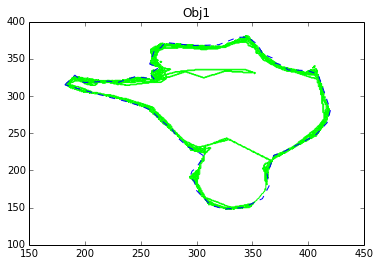

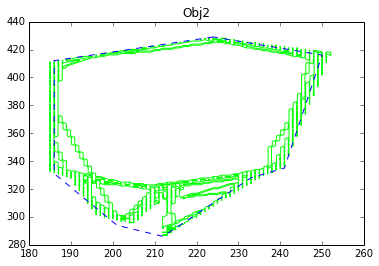

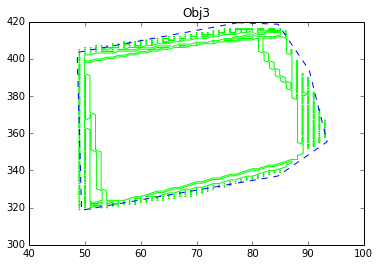

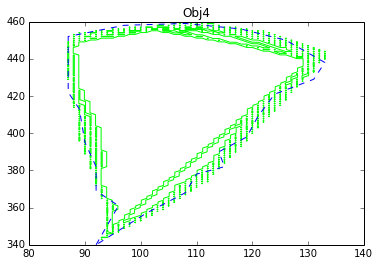

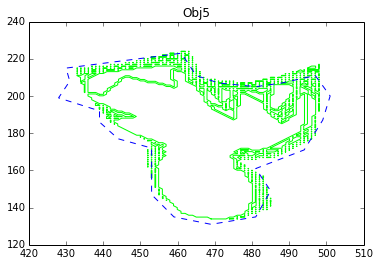

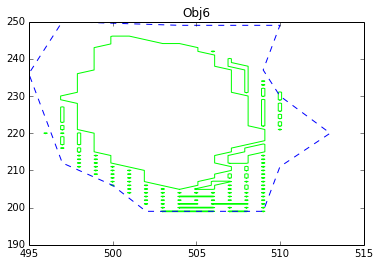

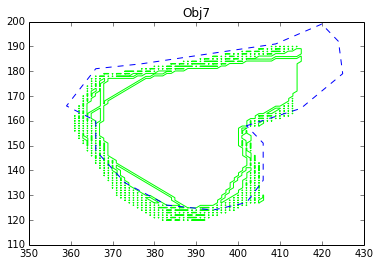

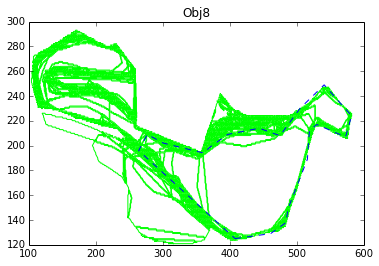

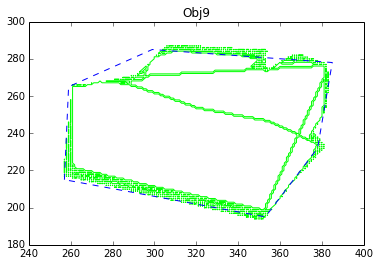

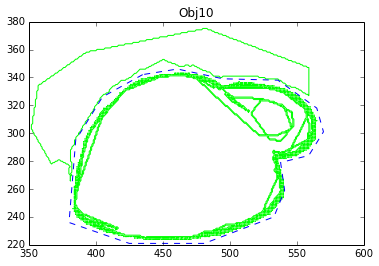

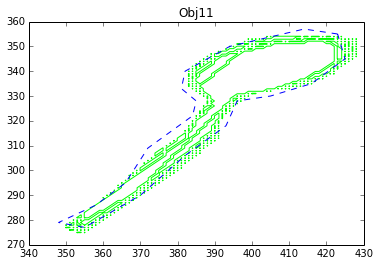

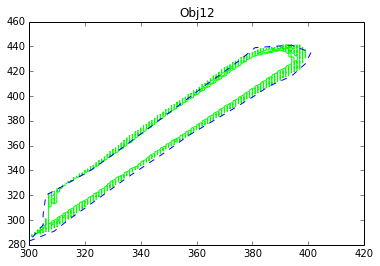

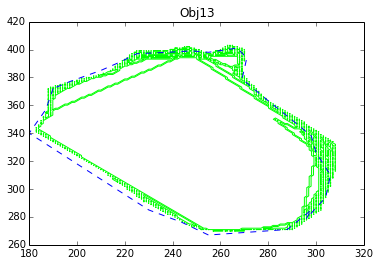

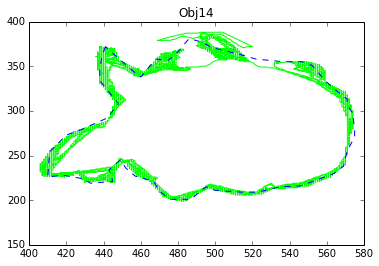

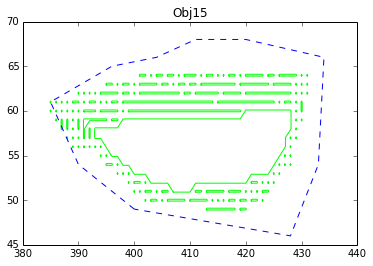

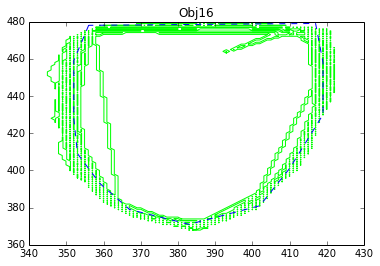

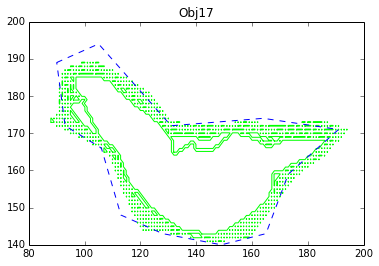

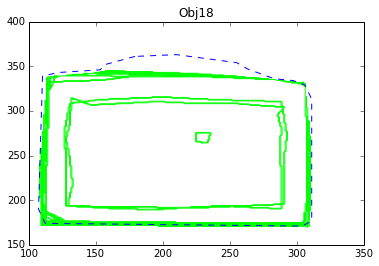

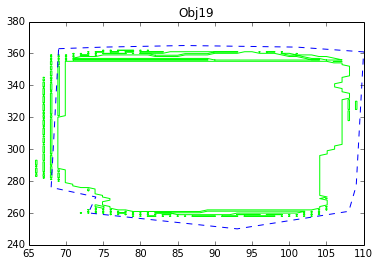

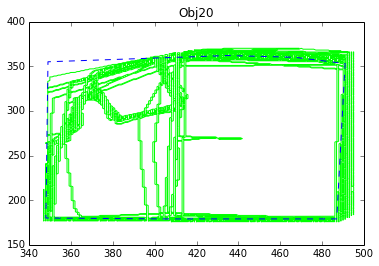

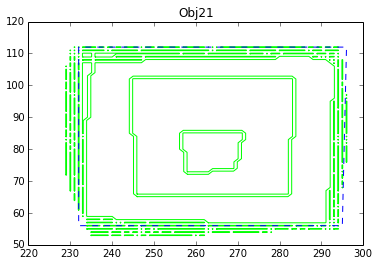

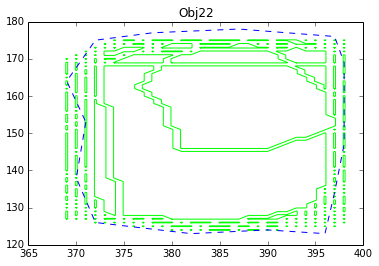

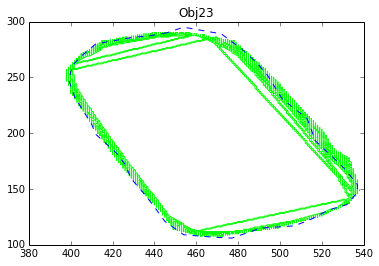

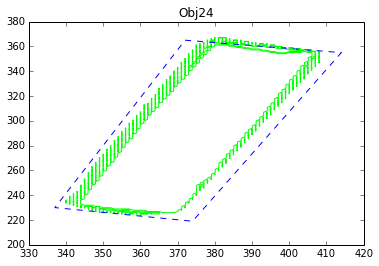

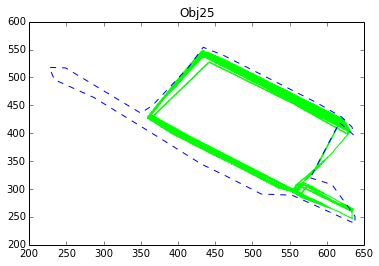

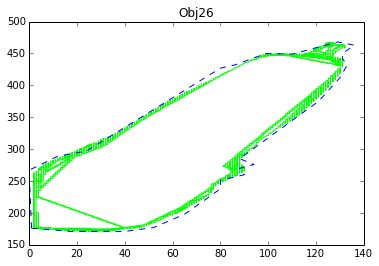

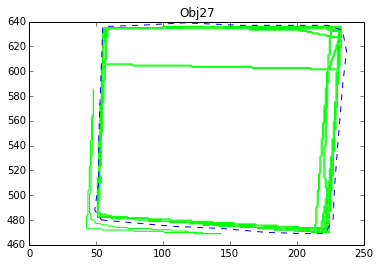

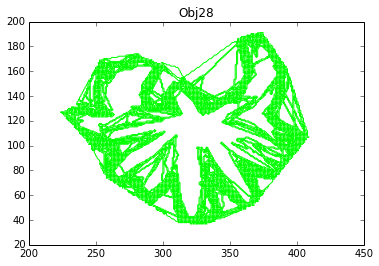

In [27]:
diff_p_lst = []
diff_r_lst = []
for objid in tqdm(object_lst):
    plt.figure()
    plt.title("Obj{}".format(objid))
    diff_p,diff_r=PR_compare(objid)
    diff_p_lst.append(diff_p)
    diff_r_lst.append(diff_r)

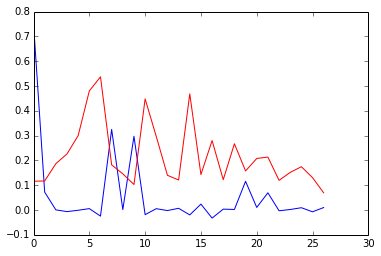

In [28]:
plt.plot(diff_p_lst)
plt.plot(diff_r_lst,color='red')

In [29]:
print "Average precision loss" , mean(diff_p_lst)
print "Average recall loss" , mean(diff_r_lst)

Average precision loss 0.0591133675635
Average recall loss 0.218657785927


In [35]:
cd TileEM/output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [38]:
best_worker

33

In [37]:
len(worker_ids)

37

In [40]:
len(bb_objects)

39

In [43]:
print worker_ids

[ 25  22  46  54 114 118 131 133 140 148 146 156 161 181 192 193 169 200
 184 199 196 208 209 135 219 223 230 234 235 214 239 241  82 247 267 270
 260]


In [42]:
print list(bb_objects.worker_id)

[92, 106, 84, 114, 68, 234, 116, 120, 129, 133, 131, 140, 148, 137, 147, 146, 143, 156, 52, 159, 161, 175, 181, 187, 9, 192, 196, 193, 184, 218, 219, 230, 235, 241, 82, 247, 239, 249, 267]


In [49]:
bb_objects = bb_info[bb_info["object_id"]==objid]
bb_objects =  bb_objects[bb_objects.worker_id!=3]
print list(bb_objects.worker_id)

[25, 22, 46, 54, 114, 118, 131, 133, 140, 148, 146, 156, 161, 181, 192, 193, 169, 200, 184, 199, 196, 208, 209, 135, 219, 223, 230, 234, 235, 214, 239, 241, 82, 247, 267, 270, 260]


In [50]:
bb_objects = bb_info[bb_info["object_id"]==objid]
bb_objects =  bb_objects[bb_objects.worker_id!=3]
print list(bb_objects.worker_id)

[25, 22, 46, 54, 114, 118, 131, 133, 140, 148, 146, 156, 161, 181, 192, 193, 169, 200, 184, 199, 196, 208, 209, 135, 219, 223, 230, 234, 235, 214, 239, 241, 82, 247, 267, 270, 260]


In [27]:
shape(indicatorMat)

(37, 1377)

In [28]:
len(worker_ids)

38

In [29]:
print worker_ids

[ 99  91 114 116 133 131 140 146 148 147 143 149 137  52 230 159 135 182
 181   9 175 156 193 169 170 189 199 196 218 222 219 234 235 214 239 246
  82 264]


In [30]:
print list(bb_objects.worker_id)

[100, 108, 68, 114, 116, 118, 120, 130, 131, 133, 140, 146, 148, 149, 137, 156, 159, 161, 167, 181, 187, 175, 193, 169, 199, 222, 219, 230, 234, 235, 238, 241, 246, 239, 247, 259]


In [32]:
[w for w in  worker_ids if w not in list(bb_objects.worker_id)]

[99, 91, 147, 143, 52, 135, 182, 9, 170, 189, 196, 218, 214, 82, 264]

In [31]:
[w for w in list(bb_objects.worker_id)  if w not in  worker_ids]

[100, 108, 68, 118, 120, 130, 161, 167, 187, 238, 241, 247, 259]

In [34]:
bb_objects = BB_info[BB_info["object_id"]==objid]
bb_objects =  bb_objects[bb_objects.worker_id!=3]
print list(bb_objects.worker_id)

[99, 91, 114, 116, 133, 131, 140, 146, 148, 147, 143, 149, 137, 52, 230, 159, 135, 182, 181, 9, 175, 156, 193, 169, 170, 189, 199, 196, 218, 222, 219, 234, 235, 214, 239, 246, 82, 264]


In [36]:
list(bb_objects.worker_id)==worker_ids

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True], dtype=bool)

In [35]:
bb_objects = bb_info[bb_info["object_id"]==objid]
bb_objects =  bb_objects[bb_objects.worker_id!=3]
print list(bb_objects.worker_id)

[99, 91, 114, 116, 133, 131, 140, 146, 148, 147, 143, 149, 137, 52, 230, 159, 135, 182, 181, 9, 175, 156, 193, 169, 170, 189, 199, 196, 218, 222, 219, 234, 235, 214, 239, 246, 82, 264]


In [88]:
cd TileEM/output/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM/output


In [89]:
best_worker

5

Best worker's PR against BBG:  0.992956869208 0.99524974385
[115, 114, 116, 126, 131, 133, 146, 140, 147, 148, 143, 156, 181, 187, 201, 9, 175, 196, 169, 184, 199, 206, 208, 209, 211, 82, 135, 214, 218, 219, 220, 192, 230, 234, 235, 241, 239, 246, 263]
39
Number of non-overlapping tile regions (M) :  652
Number of workers (N) :  39
all unvoted tiles: [ 1  4  5 12 13 74]
all unvoted workers: []
Object  47
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR: 0.0 0.0
Difference:  0.992956869208 0.99524974385
Best worker's PR against BBG:  0.992956869208 0.99524974385
[115, 114, 116, 126, 131, 133, 146, 140, 147, 148, 143, 156, 181, 187, 201, 9, 175, 196, 169, 184, 199, 206, 208, 209, 211, 82, 135, 214, 218, 219, 220, 192, 230, 234, 235, 241, 239, 246, 263]
39
Number of non-overlapping tile regions (M) :  652
Number of workers (N) :  39
all unvoted tiles: [ 1  4  5 12 13 74]
all unvoted workers: [

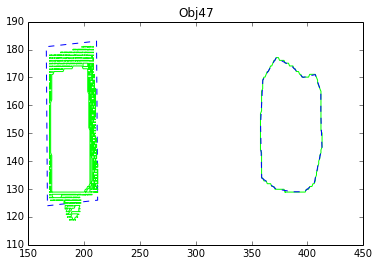

In [91]:
os.chdir("..")
img_info,object_tbl,BB_info,hit_info = load_info()
os.chdir(DATA_DIR)
diff_p_lst = []
diff_r_lst = []
# for objid in tqdm(object_lst):
#     objid=5
objid=47
plt.figure()
plt.title("Obj{}".format(objid))
diff_p,diff_r=PR_compare(objid)

worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
best_worker =  np.argmax(worker_recall_lst)
print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
os.chdir("..")
tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
os.chdir(DATA_DIR)


126
Joined PR: 0.0 0.0
Difference:  0.992956869208 0.99524974385


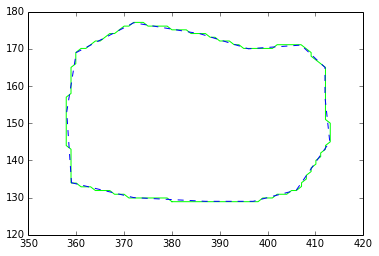

In [93]:
approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
for tidx in approved_tiles:
    plot_coords(Polygon(tiles[tidx]),color="lime")

bb_objects = BB_info[BB_info["object_id"]==objid]
bb_objects =  bb_objects[bb_objects.worker_id!=3]
best_worker_id = worker_ids[best_worker-2]
print best_worker_id
worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]
worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info["x_locs"].values[0],worker_bb_info["y_locs"].values[0]])))#.buffer(0)

plot_coords(worker_BB_polygon,linestyle='--',color='#0000ff',reverse_xy=True)

joined_bb = join_tiles(approved_tiles,tiles)

joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
print "Joined PR:",joined_p, joined_r
diff_r = max(worker_recall_lst)-joined_r
diff_p = max(worker_precision_lst)-joined_p
print "Difference: ", diff_p,diff_r


diff_p_lst.append(diff_p)
diff_r_lst.append(diff_r)


In [69]:
best_worker

5

In [63]:
print worker_ids

[115 114 116 126 131 133 146 140 147 148 143 156 181 187 201   9 175 196
 169 184 199 206 208 209 211  82 135 214 218 219 220 192 230 234 235 241
 239 246 263]


In [64]:
print list(bb_objects.worker_id)

[115, 114, 116, 126, 131, 133, 146, 140, 147, 148, 143, 156, 181, 187, 201, 9, 175, 196, 169, 184, 199, 206, 208, 209, 211, 82, 135, 214, 218, 219, 220, 192, 230, 234, 235, 241, 239, 246, 263]


In [65]:
len(list(bb_objects.worker_id))

39

In [66]:
len(worker_ids)

39

In [67]:
shape(indicatorMat)

(40, 652)

In [68]:
print list(bb_objects.worker_id)==worker_ids

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]


In [56]:
def PR_compare(objid):    
    worker_ids,worker_precision_lst,worker_recall_lst = compute_worker_PR_obj(objid,return_worker_id=True)
    best_worker =  np.argmax(worker_recall_lst)
    print "Best worker's PR against BBG: ", max(worker_precision_lst),max(worker_recall_lst)
    os.chdir("..")
    tiles,indicatorMat= createObjIndicatorMatrix(objid,PRINT=True)
    os.chdir(DATA_DIR)
    approved_tiles = np.where(indicatorMat[best_worker]==1)[0]
    for tidx in approved_tiles:
        plot_coords(Polygon(tiles[tidx]),color="lime")

    bb_objects = BB_info[BB_info["object_id"]==objid]
    bb_objects =  bb_objects[bb_objects.worker_id!=3]
    best_worker_id = worker_ids[best_worker]
    print best_worker_id
    worker_bb_info = bb_objects[bb_objects["worker_id"]==best_worker_id]
    worker_BB_polygon = Polygon(zip(*process_raw_locs([worker_bb_info["x_locs"].values[0],worker_bb_info["y_locs"].values[0]])))#.buffer(0)

    plot_coords(worker_BB_polygon,linestyle='--',color='#0000ff',reverse_xy=True)
    
    joined_bb = join_tiles(approved_tiles,tiles)
                    
    joined_p, joined_r = compute_PR(objid,approved_tiles,tiles)
    print "Joined PR:",joined_p, joined_r
    diff_r = max(worker_recall_lst)-joined_r
    diff_p = max(worker_precision_lst)-joined_p
    print "Difference: ", diff_p,diff_r
    return diff_p,diff_r

  0%|          | 0/47 [00:00<?, ?it/s]

Best worker's PR against BBG:  0.944169228157 0.992825993557
[75, 114, 116, 118, 133, 140, 131, 146, 148, 137, 149, 156, 52, 159, 175, 181, 182, 187, 170, 169, 184, 199, 201, 196, 208, 223, 219, 234, 238, 246, 239, 247, 248]
33
Number of non-overlapping tile regions (M) :  3765
Number of workers (N) :  33
all unvoted tiles: [  4   5   6   7  15  20  25  26  27  33  34  35  36  38  39  41  44  45
  47  51  54  55  59  60  61  62  63  65  66  67  68  69  70  71  72  73
  76  78  80  84  88  91  92  95  99 100 102 104 105 106 107 108 109 110
 111 112 139 160 161 163 164 166 169 170 171 176 178 195 196 212 246 248
 324 329]
all unvoted workers: []
Object  1
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
114
Joined PR:

  2%|▏         | 1/47 [01:19<1:00:47,  0.01it/s]

 0.19265022006 0.876846175945
Difference:  0.751519008098 0.115979817613
Best worker's PR against BBG:  0.977930266743 1.0
[100, 108, 68, 114, 116, 118, 120, 130, 131, 133, 140, 146, 148, 149, 137, 156, 159, 161, 167, 181, 187, 175, 193, 169, 199, 222, 219, 230, 234, 235, 238, 241, 246, 239, 247, 259]
36
Number of non-overlapping tile regions (M) :  1377
Number of workers (N) :  36
all unvoted tiles: [  1   6   9  11  12  13  15  16  17  18  19  21  23  24  25  26  27  28
  29  31  34  35  36  39  40  41  43  44  46  48  49  57  62  70  71  73
  85  86  87  92 106 148 153]
all unvoted workers: []
Object  2
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
175
Joined PR:

  4%|▍         | 2/47 [01:44<39:05,  0.02it/s]  

 0.905754672904 0.88292734103
Difference:  0.0721755938388 0.11707265897
Best worker's PR against BBG:  0.990248040059 0.94648436312
[99, 91, 114, 116, 133, 131, 140, 146, 148, 147, 143, 149, 137, 52, 230, 159, 135, 182, 181, 9, 175, 156, 193, 169, 170, 189, 199, 196, 218, 222, 219, 234, 235, 214, 239, 246, 82, 264]
38
Number of non-overlapping tile regions (M) :  815
Number of workers (N) :  38
all unvoted tiles: [  1   2   3   5   7   9  10  13  14  18  19  21  22  27  32  33  38  53
  54  56  57  60  63  78 100 101 102 106 107]
all unvoted workers: []
Object  3
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
175
Joined PR:

  6%|▋         | 3/47 [01:58<28:59,  0.03it/s]

 0.989711043852 0.759672133494
Difference:  0.000536996206573 0.186812229626
Best worker's PR against BBG:  0.981390012593 0.983619260089
[114, 68, 133, 142, 146, 131, 148, 140, 181, 52, 147, 137, 143, 156, 185, 184, 175, 187, 193, 192, 169, 199, 201, 196, 208, 209, 116, 82, 218, 219, 225, 223, 233, 234, 232, 230, 235, 265, 240]
39
Number of non-overlapping tile regions (M) :  1127
Number of workers (N) :  39
all unvoted tiles: [  0   4   6   7   9  12  13  14  16  17  18  19  20  22  24  27  28  31
  32  33  34  35  37  38  41  42  43  46  47  48  49  50  52  53  54  55
  57  59  60  65  70  75  83  89  90  96  98 109 164 191]
all unvoted workers: []
Object  4
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
232
Joined PR:

  9%|▊         | 4/47 [02:19<25:00,  0.03it/s]

 0.987877651488 0.757449735695
Difference:  -0.00648763889499 0.226169524393
Best worker's PR against BBG:  0.990837224185 0.950324076004
[114, 68, 118, 135, 131, 133, 140, 148, 147, 146, 149, 143, 52, 156, 161, 182, 82, 181, 187, 175, 196, 193, 169, 9, 199, 184, 205, 208, 219, 223, 230, 235, 238, 240, 214, 197, 247, 270]
38
Number of non-overlapping tile regions (M) :  1382
Number of workers (N) :  38
all unvoted tiles: [ 3  6  8  9 11 13 14 16 21 24 26 27 29 32 33 35 37 38 39 41 42 43 44 55 63
 76 89 91 94]
all unvoted workers: []
Object  5
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
238
Joined PR:

 11%|█         | 5/47 [02:47<23:25,  0.03it/s]

 0.991882444416 0.650338712449
Difference:  -0.00104522023162 0.299985363555
Best worker's PR against BBG:  0.996977818327 1.0
[109, 114, 118, 120, 116, 133, 136, 131, 142, 140, 135, 147, 148, 149, 146, 137, 52, 156, 181, 175, 187, 9, 193, 169, 196, 199, 184, 208, 209, 219, 218, 220, 223, 263, 225, 230, 233, 235, 214]
39
Number of non-overlapping tile regions (M) :  417
Number of workers (N) :  39
all unvoted tiles: [ 5  6  8 11 12 13 14 15 18 33 34]
all unvoted workers: []
Object  6
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
109
Joined PR:

 13%|█▎        | 6/47 [02:54<19:55,  0.03it/s]

 0.991373451936 0.519776174333
Difference:  0.00560436639123 0.480223825667
Best worker's PR against BBG:  0.942381337373 0.974135869084
[92, 106, 84, 114, 68, 234, 116, 120, 129, 133, 131, 140, 148, 137, 147, 146, 143, 156, 52, 159, 161, 175, 181, 187, 9, 192, 196, 193, 184, 218, 219, 230, 235, 241, 82, 247, 239, 249, 267]
39
Number of non-overlapping tile regions (M) :  1286
Number of workers (N) :  39
all unvoted tiles: [ 10  11  16  17  22  27  29  61  67 115]
all unvoted workers: []
Object  7
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 15%|█▍        | 7/47 [03:18<18:53,  0.04it/s]

 0.96696613716 0.4371759623
Difference:  -0.024584799787 0.536959906783
Best worker's PR against BBG:  0.965834097823 0.989920558258
[25, 22, 46, 54, 114, 118, 131, 133, 140, 148, 146, 156, 161, 181, 192, 193, 169, 200, 184, 199, 196, 208, 209, 135, 219, 223, 230, 234, 235, 214, 239, 241, 82, 247, 267, 270, 260]
37
Number of non-overlapping tile regions (M) :  6068
Number of workers (N) :  37
all unvoted tiles: [  2   3   4   5   6   7   8   9  10  12  13  14  16  19  21  22  23  25
  26  28  30  35  40  41  42  44  47  48  49  50  54  56  57  59  63  64
  65  66  68  70  75  76  79  82  84  85  88  89  90  91  93  94  95  97
  98  99 101 105 106 107 109 111 112 113 117 118 119 120 121 122 123 125
 126 143 148 167 195 199 201 202 207 209 237 240 245 287 288 292 293 294
 301 303 304 306 307 311 377 427 429 432 490 509 682 900]
all unvoted workers: []
Object  8
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: Fa

 17%|█▋        | 8/47 [05:45<28:04,  0.02it/s]

 0.640837312092 0.807886055717
Difference:  0.324996785731 0.182034502541
Best worker's PR against BBG:  0.999002583262 0.974452641021
[7, 11, 46, 54, 59, 2, 114, 68, 116, 123, 130, 140, 133, 131, 146, 148, 147, 149, 52, 161, 75, 159, 156, 181, 175, 193, 220, 218, 219, 234, 233, 230, 235, 241, 246, 82, 256, 263, 268]
39
Number of non-overlapping tile regions (M) :  1534
Number of workers (N) :  39
all unvoted tiles: [  1   2   3   4   5   6   7   8   9  10  11  15  16  19  20  23  27  29
  30  32  37  42  43  45  47  49  56  65  66  67  68  69  70  71 102 105
 122 128 129 130 146 263]
all unvoted workers: []
Object  9
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
146
Joined PR:

 19%|█▉        | 9/47 [06:14<26:19,  0.02it/s]

 0.997313577435 0.828650698305
Difference:  0.00168900582627 0.145801942716
Best worker's PR against BBG:  1.0 1.0
[46, 54, 114, 116, 142, 133, 135, 140, 131, 146, 148, 149, 147, 137, 52, 156, 167, 161, 159, 170, 169, 175, 187, 193, 184, 199, 204, 205, 219, 218, 223, 226, 233, 230, 235, 240, 239, 2, 260, 261, 139]
41
Number of non-overlapping tile regions (M) :  2411
Number of workers (N) :  41
all unvoted tiles: [ 6  7  8  9 10 15 17 21 22 26 27 28 29 30 33 49 67 69]
all unvoted workers: []
Object  10
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
2
Joined PR:

 21%|██▏       | 10/47 [07:05<26:12,  0.02it/s]

 0.702725381837 0.897197911671
Difference:  0.297274618163 0.102802088329
Best worker's PR against BBG:  0.952480721867 0.974806457062
[19, 20, 22, 30, 35, 43, 46, 54, 114, 115, 68, 116, 120, 133, 142, 131, 140, 147, 143, 148, 146, 159, 166, 161, 181, 176, 175, 220, 226, 218, 219, 233, 230, 234, 235, 214, 82, 264, 273, 256]
40
Number of non-overlapping tile regions (M) :  1327
Number of workers (N) :  40
all unvoted tiles: [  0   1   4   5   7   8  10  11  12  13  14  16  17  24  29  30  35  36
  39  40  41  44  45  47  58  68 124 126 132 135]
all unvoted workers: []
Object  11
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 23%|██▎       | 11/47 [07:30<24:34,  0.02it/s]

 0.971176901243 0.526675462761
Difference:  -0.0186961793758 0.448130994301
Best worker's PR against BBG:  1.0 1.0
[8, 6, 22, 42, 46, 53, 54, 114, 118, 116, 133, 142, 131, 140, 149, 146, 147, 150, 148, 137, 228, 143, 52, 179, 161, 156, 181, 135, 219, 218, 192, 225, 230, 234, 233, 235, 239, 2, 264, 266, 273]
41
Number of non-overlapping tile regions (M) :  1906
Number of workers (N) :  41
all unvoted tiles: [  0   1   2   3   4   5   7   8   9  10  11  12  13  14  15  20  21  22
  24  25  26  27  28  29  33  34  35  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  54  65  67  68  69  70  71  76  77  78  79  81  83
  84  86  91  92  93 103 104 116 118 128 202 221 230 232 234 315]
all unvoted workers: []
Object  12
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
2
Joined PR:

 26%|██▌       | 12/47 [08:06<23:39,  0.02it/s]

 0.994669927408 0.70394067055
Difference:  0.00533007259193 0.29605932945
Best worker's PR against BBG:  0.990987676546 0.996616520038
[7, 6, 17, 45, 46, 54, 55, 114, 68, 116, 118, 133, 140, 142, 136, 131, 146, 137, 149, 148, 147, 143, 52, 161, 170, 159, 156, 220, 219, 218, 225, 189, 230, 234, 235, 214, 239, 259]
38
Number of non-overlapping tile regions (M) :  2278
Number of workers (N) :  38
all unvoted tiles: [  0   1   2   3   4   6   7   8   9  11  12  13  14  15  18  21  23  24
  25  26  27  29  32  33  35  36  37  38  39  40  41  42  43  44  45  47
  48  49  50  51  52  53  55  56  58  59  60  61  62  63  68  72  76  77
  78  79  81  82  85  86  87  88  90  91  92  94 101 103 112 113 117 119
 128 130 133 146 153 154 159 163 164 165 169 170 174 270 339 340 504]
all unvoted workers: []
Object  13
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
146
Joined PR:

 28%|██▊       | 13/47 [08:48<23:03,  0.02it/s]

 0.993259693264 0.856723099491
Difference:  -0.00227201671822 0.139893420547
Best worker's PR against BBG:  0.978483309871 0.999429953951
[9, 12, 38, 46, 54, 59, 65, 114, 116, 118, 133, 131, 135, 146, 147, 148, 140, 52, 156, 159, 161, 170, 181, 187, 193, 169, 198, 184, 199, 218, 219, 220, 228, 230, 234, 235, 241, 214, 260]
39
Number of non-overlapping tile regions (M) :  4023
Number of workers (N) :  39
all unvoted tiles: [  2   3   6   7   8  15  16  22  35  38  39  40  46  92 118 123]
all unvoted workers: []
Object  14
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
146
Joined PR:

 30%|██▉       | 14/47 [10:34<24:56,  0.02it/s]

 0.971613234041 0.878328024618
Difference:  0.00687007582982 0.121101929334
Best worker's PR against BBG:  0.942954516257 1.0
[12, 16, 46, 51, 54, 56, 60, 116, 114, 68, 118, 130, 129, 133, 137, 146, 230, 142, 131, 140, 148, 150, 143, 156, 52, 161, 61, 181, 175, 9, 219, 218, 223, 225, 234, 235, 214, 242, 241, 261, 272]
41
Number of non-overlapping tile regions (M) :  467
Number of workers (N) :  41
all unvoted tiles: [ 2  9 12 13 17 18 19 20 21 26 28 31 34 40 42 44 49 64]
all unvoted workers: []
Object  15
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
129
Joined PR:

 32%|███▏      | 15/47 [10:43<22:52,  0.02it/s]

 0.962815366126 0.531733341831
Difference:  -0.0198608498684 0.468266658169
Best worker's PR against BBG:  0.996257177416 0.99733704391
[15, 25, 46, 54, 114, 68, 116, 135, 133, 131, 137, 141, 142, 140, 146, 149, 147, 148, 143, 52, 158, 161, 159, 156, 175, 181, 189, 219, 218, 225, 226, 234, 230, 235, 238, 264]
36
Number of non-overlapping tile regions (M) :  999
Number of workers (N) :  36
all unvoted tiles: [  1   2   4   7  11  12  13  17  19  20  23  33  57  59  61  65 108 111
 128]
all unvoted workers: []
Object  16
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
159
Joined PR:

 34%|███▍      | 16/47 [11:00<21:19,  0.02it/s]

 0.972499524129 0.854454941977
Difference:  0.0237576532875 0.142882101933
Best worker's PR against BBG:  0.946851384528 1.0
[11, 54, 59, 114, 68, 123, 116, 133, 140, 131, 147, 146, 148, 143, 52, 137, 159, 174, 161, 172, 81, 175, 135, 181, 182, 48, 184, 187, 156, 189, 9, 192, 193, 169, 199, 204, 196, 208, 201, 211, 212, 213, 82]
43
Number of non-overlapping tile regions (M) :  1218
Number of workers (N) :  43
all unvoted tiles: []
all unvoted workers: []
Object  17
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True
174
Joined PR:

 36%|███▌      | 17/47 [11:28<20:14,  0.02it/s]

 0.9794284397 0.719901016341
Difference:  -0.0325770551724 0.280098983659
Best worker's PR against BBG:  1.0 0.994172162696
[6, 9, 32, 33, 46, 54, 172, 81, 174, 175, 135, 181, 187, 156, 169, 194, 193, 114, 189, 184, 199, 201, 203, 205, 196, 208, 209, 210, 116, 211, 82, 214, 200, 217, 219, 218, 225, 256]
38
Number of non-overlapping tile regions (M) :  1386
Number of workers (N) :  38
all unvoted tiles: [  0   3   4   5   6   8   9  11  12  13  17  18  22  24  25  26  27  28
  30  31  32  33  34  35  37  38  39  41  43  44  53  56  72  85 140]
all unvoted workers: []
Object  18
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
201
Joined PR:

 38%|███▊      | 18/47 [11:52<19:07,  0.03it/s]

 0.996521793817 0.871944803386
Difference:  0.00347820618308 0.12222735931
Best worker's PR against BBG:  0.994673490937 1.0
[18, 28, 41, 46, 54, 63, 174, 181, 172, 81, 52, 175, 135, 176, 179, 82, 187, 156, 182, 9, 189, 169, 193, 196, 195, 170, 184, 199, 201, 209, 208, 114, 116, 211, 212, 213, 215, 214, 200, 48, 217]
41
Number of non-overlapping tile regions (M) :  920
Number of workers (N) :  41
all unvoted tiles: [6 7]
all unvoted workers: []
Object  19
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
174
Joined PR:

 40%|████      | 19/47 [12:11<17:58,  0.03it/s]

 0.992541051815 0.732841626159
Difference:  0.00213243912212 0.267158373841
Best worker's PR against BBG:  1.0 0.994044228099
[4, 8, 16, 38, 46, 54, 81, 174, 52, 175, 135, 181, 195, 187, 9, 189, 156, 193, 196, 169, 192, 199, 184, 208, 209, 201, 212, 213, 82, 215, 214, 200, 217, 219, 218, 234, 230, 238, 241, 259]
40
Number of non-overlapping tile regions (M) :  1408
Number of workers (N) :  40
all unvoted tiles: [  2   3   6   8   9  10  13  14  16  18  20  24  29  33  35  37  39  46
  48  52  53  54  63  83 101 111]
all unvoted workers: []
Object  20
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
201
Joined PR:

 43%|████▎     | 20/47 [12:44<17:11,  0.03it/s]

 0.884256402807 0.836478041915
Difference:  0.115743597193 0.157566186184
Best worker's PR against BBG:  1.0 0.99929973859
[13, 30, 46, 48, 54, 57, 178, 81, 174, 175, 135, 181, 184, 187, 9, 189, 156, 169, 193, 196, 201, 199, 114, 209, 208, 116, 211, 82, 215, 214, 200, 217, 218, 219, 192, 225, 230, 234, 256]
39
Number of non-overlapping tile regions (M) :  380
Number of workers (N) :  39
all unvoted tiles: [ 3  5  6  7 10 12 18 20 22 26 27 28]
all unvoted workers: []
Object  21
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
174
Joined PR:

 45%|████▍     | 21/47 [12:51<15:55,  0.03it/s]

 0.989629765008 0.791580669483
Difference:  0.0103702349915 0.207719069108
Best worker's PR against BBG:  1.0 0.999819620027
[6, 24, 30, 46, 52, 54, 174, 172, 81, 175, 82, 135, 187, 181, 9, 189, 156, 193, 196, 169, 198, 184, 199, 201, 205, 207, 114, 208, 209, 210, 116, 213, 215, 214, 200, 217, 220, 218, 259]
39
Number of non-overlapping tile regions (M) :  432
Number of workers (N) :  39
all unvoted tiles: [ 1  3  4  6  8  9 10 11 12 14 15 16 17 23 27 28 29 30 35 36 38 40 42 44 46
 63 74]
all unvoted workers: []
Object  22
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
198
Joined PR:

 47%|████▋     | 22/47 [12:59<14:45,  0.03it/s]

 0.930663085376 0.786285385923
Difference:  0.0693369146245 0.213534234104
Best worker's PR against BBG:  0.988432832752 0.996494793856
[66, 97, 71, 111, 114, 68, 116, 118, 130, 133, 181, 148, 131, 140, 146, 149, 137, 156, 52, 166, 161, 159, 175, 187, 193, 192, 219, 218, 225, 234, 230, 233, 235, 238, 241, 239, 260]
37
Number of non-overlapping tile regions (M) :  2877
Number of workers (N) :  37
all unvoted tiles: [  2   3   5  10  12  15  16  17  19  20  21  23  24  25  26  27  28  29
  31  37  38  42  43  46  47  51  54  57  58  60  62  63  64  66  70  71
  72  73  75  78  80  81  82  84  85  86  88  89  90  91  94  95  96  98
 101 103 104 113 127 146 160 190 192 200 205 211 221 222 223 224 304 323
 334 356]
all unvoted workers: []
Object  23
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
137
Joined PR:

 49%|████▉     | 23/47 [13:53<14:30,  0.03it/s]

 0.991508790513 0.876969541287
Difference:  -0.00307595776093 0.119525252569
Best worker's PR against BBG:  0.997938526121 0.997969244052
[91, 116, 68, 118, 135, 133, 131, 140, 149, 147, 148, 137, 146, 143, 52, 160, 161, 187, 181, 175, 189, 156, 169, 193, 196, 170, 184, 199, 218, 223, 219, 225, 222, 228, 230, 233, 234, 256]
38
Number of non-overlapping tile regions (M) :  1487
Number of workers (N) :  38
all unvoted tiles: [ 1  5  8  9 10 11 12 13 14 15 17 18 20 21 26 27 29 30 44 45 46 47 50]
all unvoted workers: []
Object  24
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
143
Joined PR:

 51%|█████     | 24/47 [14:21<13:45,  0.03it/s]

 0.995983975251 0.846440710056
Difference:  0.00195455086986 0.151528533996
Best worker's PR against BBG:  0.998893855695 0.988457154451
[114, 68, 136, 133, 131, 140, 143, 146, 147, 148, 181, 52, 187, 156, 193, 169, 196, 184, 9, 199, 201, 205, 208, 209, 135, 82, 214, 219, 218, 234, 230, 235, 241, 250, 247, 248, 253, 260]
38
Number of non-overlapping tile regions (M) :  8669
Number of workers (N) :  38
all unvoted tiles: [  2   9  10  13  14  15  16  17  18  19  20  21  24  29  30  31  32  36
  38  39  40  41  42  43  45  46  47  56  57  60  65  68  70  72  74  76
  82  84  85  86  88  90  91  92  93  94  95  96  97  98  99 100 101 102
 105 106 110 111 112 113 121 125 126 127 129 130 131 132 133 135 136 161
 173 175 176 178 179 261 266 268 269 318 322 342 395 400 623 676 699]
all unvoted workers: []
Object  25
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
248
Joined PR:

 53%|█████▎    | 25/47 [17:12<15:08,  0.02it/s]

 0.989678487144 0.813867895825
Difference:  0.00921536855033 0.174589258626
Best worker's PR against BBG:  0.991131807377 0.976675090905
[83, 114, 68, 116, 123, 130, 131, 133, 142, 140, 147, 137, 148, 146, 52, 156, 181, 175, 187, 198, 193, 170, 169, 196, 184, 218, 219, 222, 225, 228, 234, 230, 232, 235, 214, 270]
36
Number of non-overlapping tile regions (M) :  3062
Number of workers (N) :  36
all unvoted tiles: [  3   5   6   7  10  11  12  14  15  16  17  20  23  24  25  26  28  30
  31  36  38  39  41  42  49  50  54  66  67  75  78  80 102 159 176]
all unvoted workers: []
Object  26
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
219
Joined PR:

 55%|█████▌    | 26/47 [18:08<14:39,  0.02it/s]

 0.998359548698 0.84619847505
Difference:  -0.00722774132149 0.130476615855
Best worker's PR against BBG:  0.991800266633 0.999469612716
[68, 114, 120, 219, 116, 118, 136, 135, 131, 141, 133, 140, 142, 146, 147, 149, 181, 148, 143, 137, 52, 160, 161, 159, 9, 156, 187, 175, 193, 218, 234, 230, 235, 245, 82, 239, 247, 252, 258]
39
Number of non-overlapping tile regions (M) :  1137
Number of workers (N) :  39
all unvoted tiles: [ 5  6  7  8  9 14 15 16 17 18 19 20 21 22 23 26 30 32 48 57 60 79]
all unvoted workers: []
Object  27
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
120
Joined PR:

 57%|█████▋    | 27/47 [18:29<13:41,  0.02it/s]

 0.981897370787 0.930309553873
Difference:  0.00990289584639 0.0691600588437
Best worker's PR against BBG:  0.953792059371 0.997547752406
[114, 68, 133, 131, 140, 146, 148, 137, 52, 82, 48, 9, 156, 175, 169, 201, 184, 199, 196, 208, 212, 213, 214, 219, 228, 230, 234, 241, 239, 247, 250, 252, 271]
33
Number of non-overlapping tile regions (M) :  4506
Number of workers (N) :  33
all unvoted tiles: [  2   4   7  13  19  22  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  40  42  44  45  46  47  48  49  50  51  52  53  54  56  59
  61  62  64  65  66  67  70  71  75  76  83 115 129 161 162 164 167 169
 170 185 187 220]
all unvoted workers: []
Object  28
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
271
Joined PR:

 60%|█████▉    | 28/47 [21:26<14:32,  0.02it/s]

 0.720333273953 0.681026840767
Difference:  0.233458785419 0.316520911639
Best worker's PR against BBG:  0.978628380736 1.0
[76, 84, 86, 105, 114, 68, 133, 140, 131, 135, 147, 149, 146, 148, 52, 161, 167, 187, 9, 82, 181, 175, 156, 195, 192, 193, 184, 234, 241, 239, 75, 252, 254, 81, 256]
35
Number of non-overlapping tile regions (M) :  3409
Number of workers (N) :  35
all unvoted tiles: [  2   3   7   8   9  10  12  14  15  16  18  21  22  24  27  28  30  31
  32  33  36  37  44  46  47  48  49  53  54  58  61  62  65  66  67  68
  80  82 141 234]
all unvoted workers: []
Object  29
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
84
Joined PR:

 62%|██████▏   | 29/47 [22:53<14:12,  0.02it/s]

 0.850063552395 0.770577594644
Difference:  0.128564828341 0.229422405356
Best worker's PR against BBG:  0.852042398034 0.994602705259
[68, 114, 116, 118, 133, 131, 147, 140, 146, 148, 149, 143, 161, 167, 181, 175, 184, 156, 187, 193, 169, 199, 201, 196, 208, 211, 225, 223, 226, 234, 230, 241, 239, 263]
34
Number of non-overlapping tile regions (M) :  2863
Number of workers (N) :  34
all unvoted tiles: [  1   6   7   8   9  13  16  18  20  21  22  24  27  28  34  35  38  39
  40  41  43  44  45  46  47  49  52  55  56  57  58  59  62  63  64  65
  66  67  71  73  75  84  86  87  88  92  93  96  98 100 107 108 111 118
 121 126 156 170 277 287]
all unvoted workers: []
Object  30
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 64%|██████▍   | 30/47 [24:02<13:37,  0.02it/s]

 0.914887032255 0.70460608359
Difference:  -0.0628446342202 0.289996621669
Best worker's PR against BBG:  0.980299993322 0.995706743051
[34, 114, 116, 118, 123, 133, 141, 135, 140, 131, 148, 146, 149, 147, 137, 155, 156, 52, 161, 181, 175, 187, 169, 193, 9, 199, 196, 208, 218, 219, 225, 234, 230, 235, 241, 245, 214, 246, 260]
39
Number of non-overlapping tile regions (M) :  2954
Number of workers (N) :  39
all unvoted tiles: [  0   2  15  21  24  25  27  28  29  30  32  33  34  35  36  37  40  43
  46  47  49  50  51  52  54  55  57  61  63  65  66  67 128 140 168 174
 192 198 305 322 333 368 373 513]
all unvoted workers: []
Object  31
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
245
Joined PR:

 66%|██████▌   | 31/47 [25:06<12:57,  0.02it/s]

 0.990110596321 0.905629955562
Difference:  -0.00981060299855 0.0900767874885
Best worker's PR against BBG:  0.995941869537 0.993495302881
[66, 76, 89, 97, 114, 116, 120, 140, 133, 131, 147, 148, 146, 52, 166, 175, 184, 187, 156, 193, 192, 169, 201, 218, 223, 219, 225, 230, 234, 235, 240, 239, 247]
33
Number of non-overlapping tile regions (M) :  3550
Number of workers (N) :  33
all unvoted tiles: [  3   7  10  15  16  17  18  20  24  25  28  30  31  34  35  36  37  39
  41  43  44  47  48  49  50  52  53  56  57  58  62  63  64  65 100 106
 107 113 115 154 162 177 198 199 212 213 365 366]
all unvoted workers: []
Object  32
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
184
Joined PR:

 68%|██████▊   | 32/47 [26:19<12:20,  0.02it/s]

 0.895422711858 0.920258836173
Difference:  0.100519157679 0.0732364667083
Best worker's PR against BBG:  0.97926068494 0.997923402884
[72, 103, 114, 116, 123, 133, 139, 135, 131, 146, 140, 148, 147, 52, 181, 156, 175, 187, 169, 9, 193, 184, 199, 209, 205, 196, 208, 82, 219, 218, 192, 225, 228, 230, 234, 235, 214, 239, 263]
39
Number of non-overlapping tile regions (M) :  4331
Number of workers (N) :  39
all unvoted tiles: [  1   6   8   9  12  15  17  19  23  24  25  26  28  29  30  31  32  33
  34  35  36  37  38  39  40  41  42  43  44  47  49  52  56  58  62  64
  65  67  77  79  81  83  85  89  93  95  96  97  99 100 103 105 109 110
 111 113 115 116 124 126 127 128 129 130 131 133 136 138 147 162 221 226
 229 241 245 247 271 332 339 344 379 435 482 570 792 793]
all unvoted workers: []
Object  33
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
123
Joined PR:

 70%|███████   | 33/47 [28:12<11:57,  0.02it/s]

 0.956671242561 0.942667645315
Difference:  0.0225894423793 0.0552557575688
Best worker's PR against BBG:  0.993635293917 0.98528563317
[114, 116, 131, 133, 140, 148, 147, 143, 137, 151, 146, 181, 156, 187, 193, 192, 196, 200, 169, 234, 9, 184, 199, 208, 209, 214, 135, 220, 218, 219, 225, 228, 230, 235, 243, 197, 260]
37
Number of non-overlapping tile regions (M) :  6066
Number of workers (N) :  37
all unvoted tiles: [  4   5   8  11  13  14  15  22  24  25  27  31  35  36  37  38  41  42
  45  46  51  53  56  63  64  65  69  70  71  72  75  76  77  80  83  84
  85  86  93  94 103 105 106 107 108 109 111 112 115 118 119 120 121 129
 130 134 138 143 144 146 147 150 154 155 190 198 259 265 275 276 279 345]
all unvoted workers: []
Object  34
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
140
Joined PR:

 72%|███████▏  | 34/47 [30:46<11:46,  0.02it/s]

 0.98028789753 0.852315888654
Difference:  0.0133473963876 0.132969744516
Best worker's PR against BBG:  0.904921900199 1.0
[34, 110, 114, 68, 133, 141, 135, 140, 148, 146, 149, 52, 161, 184, 181, 48, 187, 193, 169, 199, 201, 196, 208, 219, 222, 228, 230, 234, 241, 246, 247, 250, 252, 256]
34
Number of non-overlapping tile regions (M) :  6771
Number of workers (N) :  34
all unvoted tiles: [   1    2    3    6    7    8    9   10   11   12   13   14   15   19   21
   24   26   27   30   32   33   34   35   36   37   39   40   41   43   45
   47   50   51   53   55   56   58   61   62   64   65   66   67   69   71
   72   74   76   77   81   82   85   86   88   92   98   99  103  106  109
  114  115  116  117  120  123  129  130  133  136  137  138  139  140  141
  143  171  172  176  202  204  206  209  224  378  379  380  381  414  524
  694 1016 1311 1591]
all unvoted workers: []
Object  35
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zer

 74%|███████▍  | 35/47 [33:07<11:21,  0.02it/s]

 0.174886792694 0.95561083761
Difference:  0.730035107505 0.0443891623897
Best worker's PR against BBG:  0.997405428439 0.967924529193
[93, 83, 84, 114, 68, 118, 133, 136, 137, 131, 142, 141, 140, 135, 143, 148, 147, 155, 52, 161, 181, 156, 187, 9, 175, 192, 193, 169, 218, 219, 225, 228, 233, 230, 235, 241, 239, 123]
38
Number of non-overlapping tile regions (M) :  5927
Number of workers (N) :  38
all unvoted tiles: [  0   2   3   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  30  38  41  43  44  45  46  47  48  50
  51  52  53  54  55  56  57  58  59  60  61  63  64  65  66  67  69  70
  72  73  74  75  76  77  78  79  81  83  84  86  88  90  91  97  98 101
 102 103 104 107 111 112 114 115 116 117 119 121 122 123 125 126 127 128
 130 133 135 136 137 138 139 140 141 142 143 144 145 146 147 148 150 151
 152 153 155 156 157 158 159 160 161 162 164 165 166 167 168 170 171 173
 176 178 180 182 184 186 189 191 192 194 196 198 200 202 204 207 209 

 77%|███████▋  | 36/47 [35:06<10:43,  0.02it/s]

 0.99361996016 0.837596010974
Difference:  0.00378546827917 0.130328518219
Best worker's PR against BBG:  0.985924409595 0.99114444876
[114, 68, 133, 140, 131, 147, 137, 148, 146, 143, 156, 52, 182, 181, 187, 193, 169, 184, 201, 199, 208, 209, 211, 82, 135, 214, 219, 234, 230, 235, 241, 239, 246, 247, 250, 260]
36
Number of non-overlapping tile regions (M) :  2503
Number of workers (N) :  36
all unvoted tiles: [  0   1   2   3   4   5   6   7   9  14  15  17  21  22  25  29  30  31
  33  34  36  38  39  41  42  43  45  48  49  50  51  53  54  56  57  58
  59  61  62  66  68  69  70  71  72  74  75  76  78  80  87  98 120 129
 133 134 135 153 155 238 246 324 331]
all unvoted workers: []
Object  37
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 79%|███████▊  | 37/47 [36:08<09:46,  0.02it/s]

 0.984059590766 0.743535313995
Difference:  0.00186481882922 0.247609134765
Best worker's PR against BBG:  0.993023019738 0.991170637715
[68, 82, 114, 116, 118, 135, 131, 133, 141, 142, 149, 140, 137, 148, 147, 146, 52, 156, 181, 175, 187, 192, 193, 195, 169, 184, 219, 218, 222, 223, 226, 228, 234, 230, 235, 246, 260]
37
Number of non-overlapping tile regions (M) :  2197
Number of workers (N) :  37
all unvoted tiles: [  0   2   6   9  11  12  15  16  17  19  22  23  27  29  32  33  36  37
  38  41  45  47  50  51  52  53  54  55  78 107 108 113 115 117 121 128
 130 131 136 137 192 193]
all unvoted workers: []
Object  38
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
219
Joined PR:

 81%|████████  | 38/47 [36:57<08:45,  0.02it/s]

 0.995475255995 0.913290436965
Difference:  -0.00245223625665 0.0778802007505
Best worker's PR against BBG:  0.992787061632 0.995329003269
[112, 114, 116, 122, 133, 140, 131, 147, 148, 146, 143, 149, 137, 52, 156, 161, 181, 187, 184, 175, 193, 170, 169, 9, 199, 205, 204, 201, 219, 218, 222, 225, 231, 233, 234, 230, 235, 240, 256]
39
Number of non-overlapping tile regions (M) :  2968
Number of workers (N) :  39
all unvoted tiles: [  3   6   8   9  10  12  22  25  27  29  31  32  33  35  39  41  43  46
  47  49  50  52  56  57  58  59  64  95  98  99 121 122 123 132 200]
all unvoted workers: []
Object  39
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
201
Joined PR:

 83%|████████▎ | 39/47 [38:06<07:49,  0.02it/s]

 0.99693493039 0.946249999447
Difference:  -0.00414786875869 0.0490790038221
Best worker's PR against BBG:  0.969951783684 1.0
[92, 97, 63, 9, 88, 114, 68, 133, 131, 141, 140, 136, 147, 146, 148, 52, 75, 159, 161, 181, 187, 156, 175, 193, 184, 169, 199, 205, 196, 218, 219, 225, 230, 234, 235, 214, 239, 246, 262]
39
Number of non-overlapping tile regions (M) :  1256
Number of workers (N) :  39
all unvoted tiles: [ 4  7 11 12 16 17 18 20 21 22 23 24 29 35 36 46 48 49 57 58 61 63 64]
all unvoted workers: []
Object  40
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
68
Joined PR:

 85%|████████▌ | 40/47 [38:35<06:45,  0.02it/s]

 0.0206312682086 1.0
Difference:  0.949320515476 0.0
Best worker's PR against BBG:  0.938146640755 1.0
[103, 68, 118, 133, 131, 141, 145, 140, 146, 147, 148, 52, 156, 161, 9, 181, 193, 169, 196, 184, 208, 209, 213, 214, 135, 215, 219, 192, 225, 234, 230, 235, 240, 239, 247, 250, 260]
37
Number of non-overlapping tile regions (M) :  1757
Number of workers (N) :  37
all unvoted tiles: [  1   3   4   5   7   8  11  12  13  15  16  17  21  22  24  25  28  32
  34  37  42  47  48  51  53  54  55  56  57  59  60  61  62  66  67  68
  69  70  75  76  77  79  80  81  82  85  89  96  99 100 101 102 105 107
 108 110 111 114 115 118 121 122 123 126 129 130 132 139 141 143 173 184
 193 218 222 223 224 240 280 282 380 429 515 596]
all unvoted workers: []
Object  41
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
118
Joined PR:

 87%|████████▋ | 41/47 [39:06<05:43,  0.02it/s]

 0.863864373054 0.570871040373
Difference:  0.0742822677006 0.429128959627
Best worker's PR against BBG:  1.0 0.928517279158
[75, 114, 68, 133, 136, 141, 135, 140, 131, 147, 175, 148, 137, 146, 52, 159, 161, 181, 176, 187, 156, 169, 193, 199, 184, 201, 196, 208, 116, 219, 218, 192, 223, 228, 230, 234, 235, 239, 256]
39
Number of non-overlapping tile regions (M) :  1615
Number of workers (N) :  39
all unvoted tiles: [  1   5   6   8  11  12  16  17  24  27  28  29  37  38  40  41  42  43
  44  45  46  80  81  97  99 109 113 198]
all unvoted workers: []
Object  42
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
114
Joined PR:

 89%|████████▉ | 42/47 [39:34<04:42,  0.02it/s]

 1.0 0.0489979550102
Difference:  0.0 0.879519324148
Best worker's PR against BBG:  0.990731860966 0.955524897277
[66, 90, 110, 68, 114, 116, 118, 120, 133, 131, 140, 135, 147, 137, 148, 156, 146, 52, 161, 15, 175, 187, 193, 197, 169, 199, 234, 205, 196, 208, 218, 219, 225, 228, 230, 235, 240, 241, 214, 260]
40
Number of non-overlapping tile regions (M) :  2725
Number of workers (N) :  40
all unvoted tiles: [  2   9  16  18  19  23  24  25  27  32  33  34  36  37  38  39  40  43
  44  47  49  51  53 101 103 107 109 110 111 112 113 123 129 133 135 136
 137 176 188 216]
all unvoted workers: []
Object  43
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
199
Joined PR:

 91%|█████████▏| 43/47 [40:38<03:46,  0.02it/s]

 0.994585251151 0.831698951496
Difference:  -0.00385339018498 0.12382594578
Best worker's PR against BBG:  0.967303420486 0.979651135897
[66, 111, 114, 68, 133, 141, 131, 140, 148, 147, 146, 150, 149, 137, 52, 156, 161, 181, 175, 187, 193, 169, 184, 201, 199, 9, 196, 208, 218, 189, 162, 219, 225, 234, 230, 240, 241, 214, 266]
39
Number of non-overlapping tile regions (M) :  2741
Number of workers (N) :  39
all unvoted tiles: [  2   4   6   7   9  10  11  13  14  15  17  19  20  25  27  28  29  30
  31  36  38  39  40  41  42  43  44  47  48  49  50  51  53  55  58  60
  63  66  68  69  71  88  96 105 124 125 126 135 137 144 148 167 171 187
 193 212 215 377]
all unvoted workers: []
Object  44
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 94%|█████████▎| 44/47 [41:45<02:50,  0.02it/s]

 0.985227019688 0.815564251176
Difference:  -0.0179235992023 0.164086884721
Best worker's PR against BBG:  0.999828254118 0.974801026442
[68, 73, 114, 116, 118, 133, 140, 131, 149, 147, 148, 146, 137, 156, 52, 175, 181, 187, 9, 193, 169, 196, 201, 184, 199, 205, 209, 218, 219, 189, 230, 234, 235, 244, 240, 241, 246, 270]
38
Number of non-overlapping tile regions (M) :  768
Number of workers (N) :  38
all unvoted tiles: [  1   3   5   6   7   8   9  10  15  16  19  20  21  22  29  31  45  52
  82  91 105]
all unvoted workers: []
Object  45
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR:

 96%|█████████▌| 45/47 [41:58<01:51,  0.02it/s]

 0.984208129189 0.695351555002
Difference:  0.015620124929 0.27944947144
Best worker's PR against BBG:  0.973335085088 0.993678445979
[68, 114, 118, 116, 130, 131, 133, 135, 136, 142, 140, 148, 137, 149, 146, 156, 52, 161, 159, 181, 184, 234, 187, 193, 175, 169, 199, 201, 196, 218, 219, 225, 230, 235, 240, 241, 82, 259]
38
Number of non-overlapping tile regions (M) :  2085
Number of workers (N) :  38
all unvoted tiles: [  1   3   4   5   6   7   9  10  12  13  21  23  24  26  28  32  35  38
  41  52  56  61  80  84  97 100 125 173 210]
all unvoted workers: []
Object  46
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
169
Joined PR:

 98%|█████████▊| 46/47 [42:42<00:55,  0.02it/s]

 0.992664939236 0.778670502583
Difference:  -0.0193298541482 0.215007943396
Best worker's PR against BBG:  0.992956869208 0.99524974385
[115, 114, 116, 126, 131, 133, 146, 140, 147, 148, 143, 156, 181, 187, 201, 9, 175, 196, 169, 184, 199, 206, 208, 209, 211, 82, 135, 214, 218, 219, 220, 192, 230, 234, 235, 241, 239, 246, 263]
39
Number of non-overlapping tile regions (M) :  652
Number of workers (N) :  39
all unvoted tiles:

 [ 1  4  5 12 13 74]
all unvoted workers: []
Object  47
Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: False
133
Joined PR: 0.0 0.0
Difference:  0.992956869208 0.99524974385


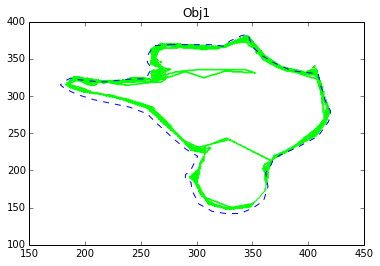

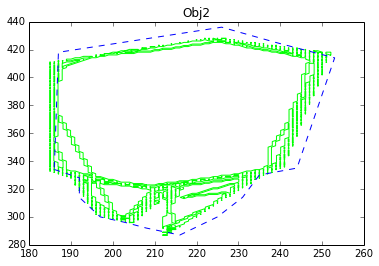

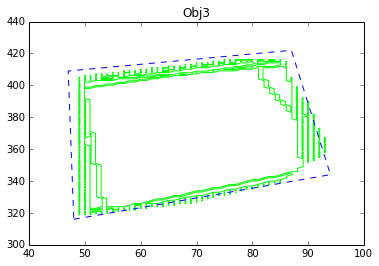

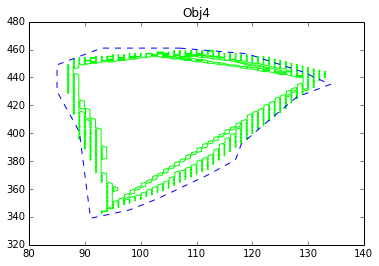

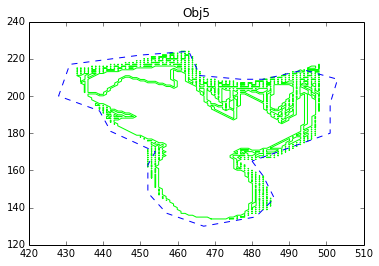

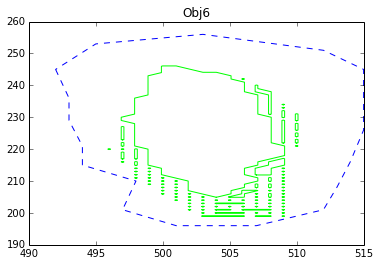

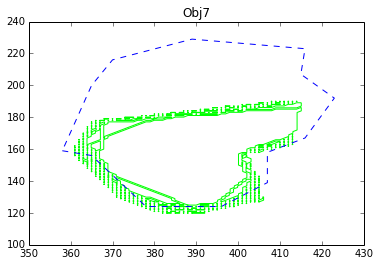

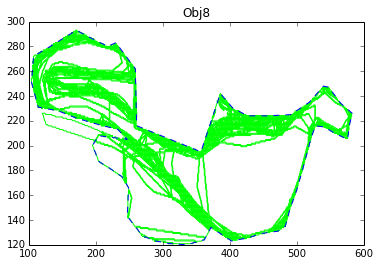

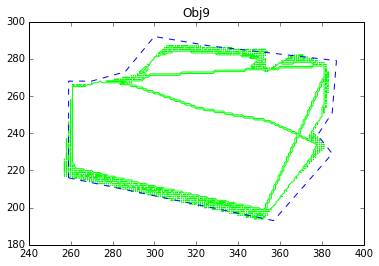

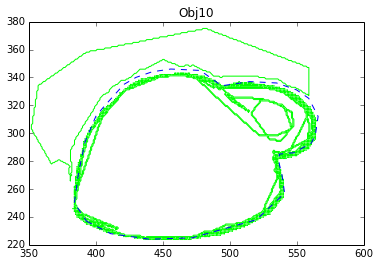

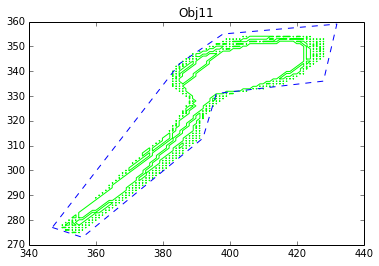

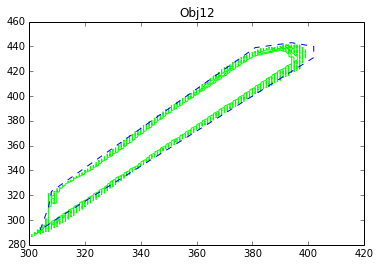

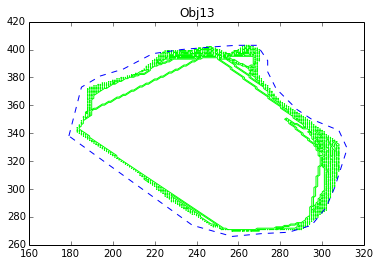

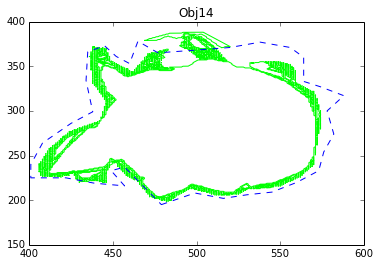

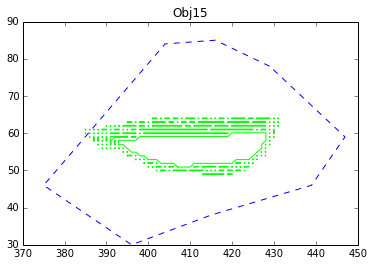

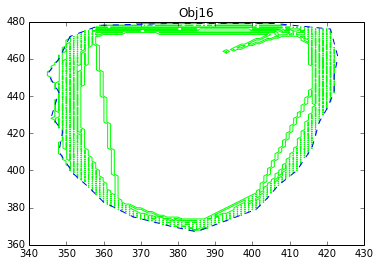

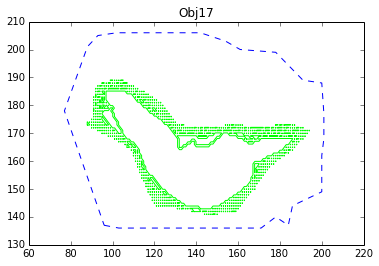

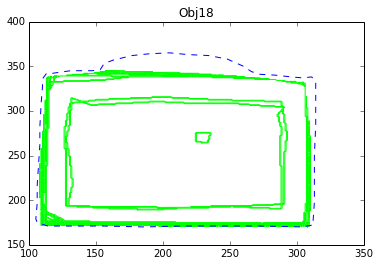

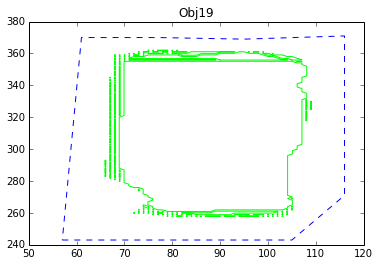

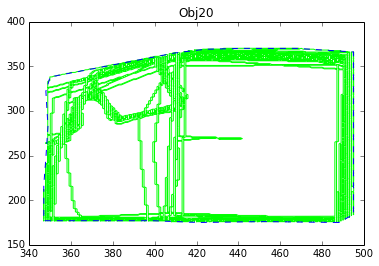

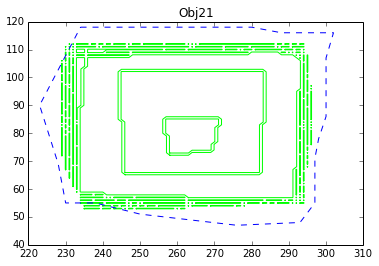

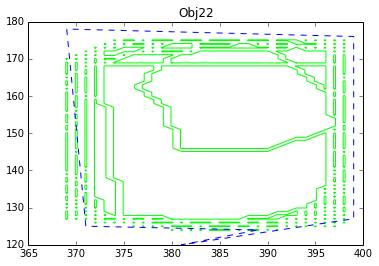

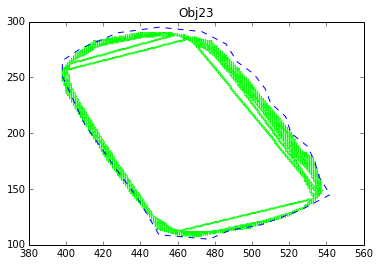

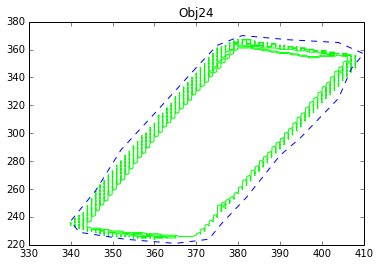

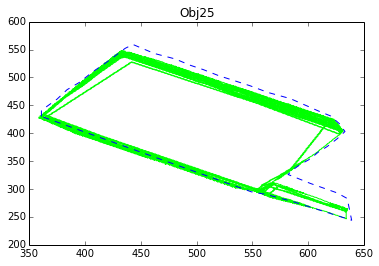

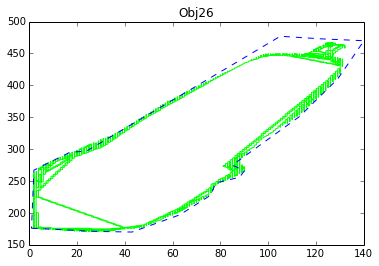

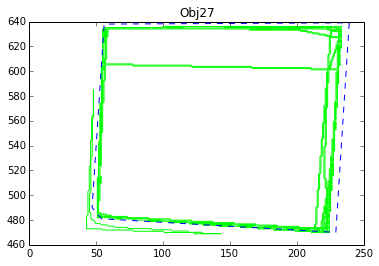

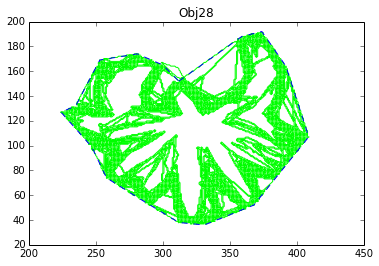

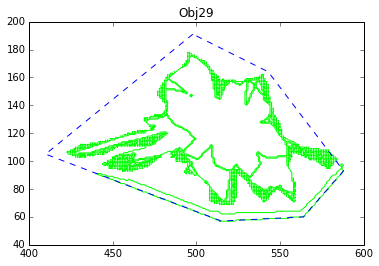

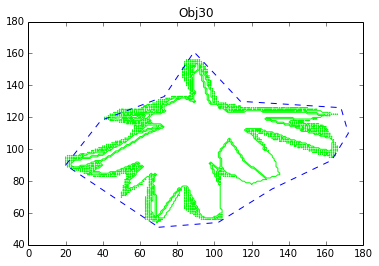

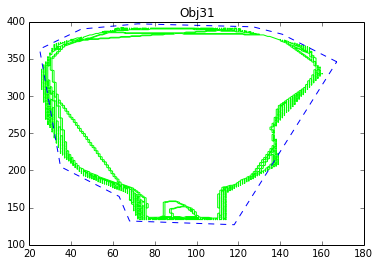

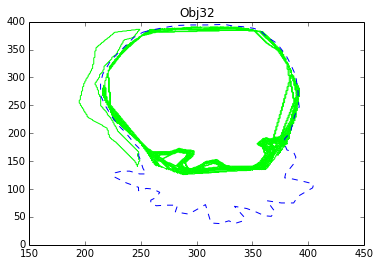

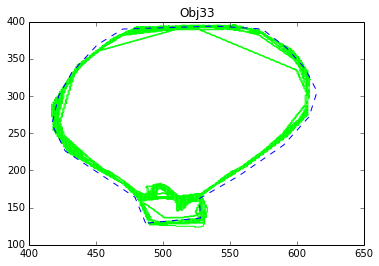

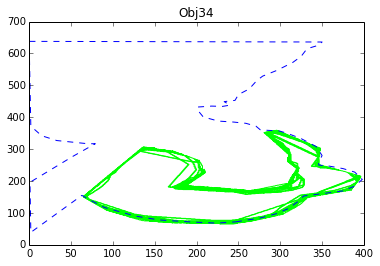

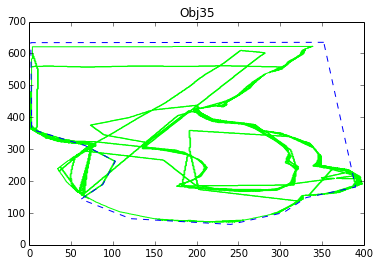

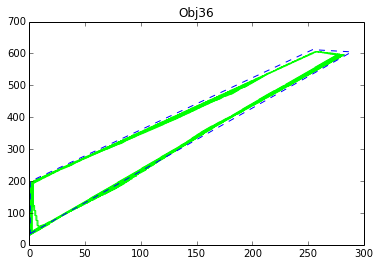

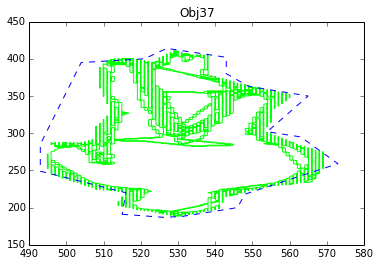

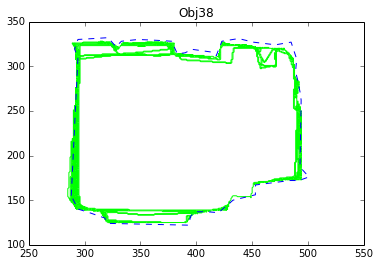

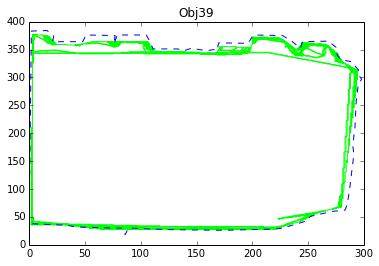

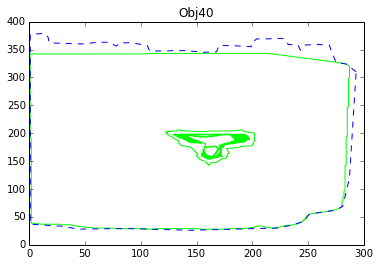

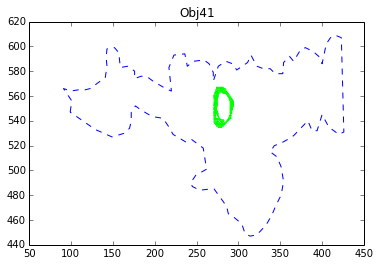

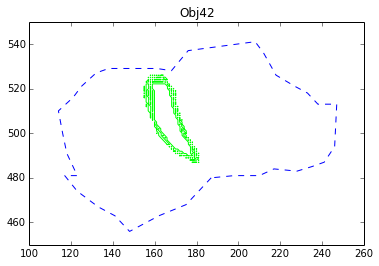

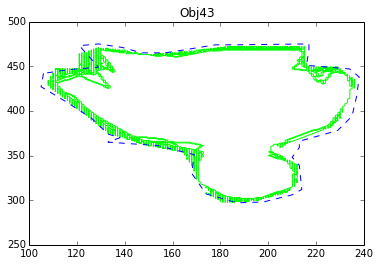

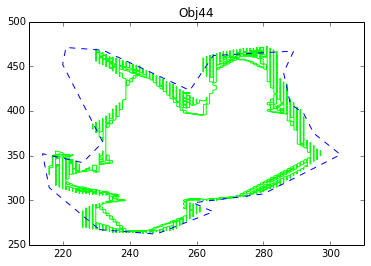

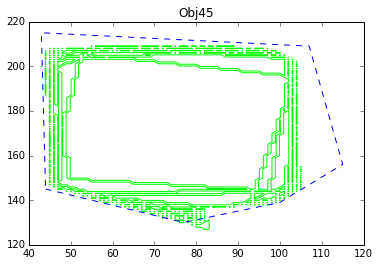

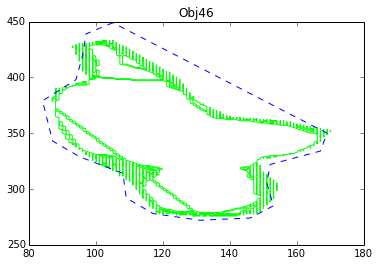

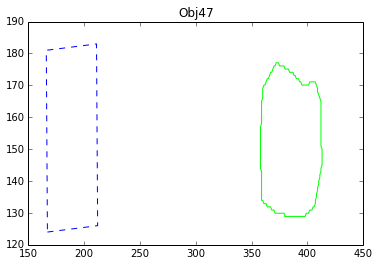

In [58]:
os.chdir("..")
img_info,object_tbl,BB_info,hit_info = load_info()
os.chdir(DATA_DIR)
diff_p_lst = []
diff_r_lst = []
for objid in tqdm(object_lst):
    plt.figure()
    plt.title("Obj{}".format(objid))
    diff_p,diff_r=PR_compare(objid)
    diff_p_lst.append(diff_p)
    diff_r_lst.append(diff_r)

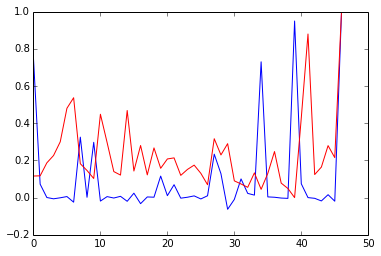

In [59]:
plt.plot(diff_p_lst)
plt.plot(diff_r_lst,color='red')

In [60]:
print "Average precision loss" , mean(diff_p_lst)
print "Average recall loss" , mean(diff_r_lst)

Average precision loss 0.100894542991
Average recall loss 0.228229642721


In [10]:
import numpy as np
np.linspace(0.1,0.9,9)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [11]:
range(10,100,10)

[10, 20, 30, 40, 50, 60, 70, 80, 90]